<a href="https://colab.research.google.com/github/pablomesenn/Inteligencia-Artificial/blob/main/IA_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Inteligencia Artificial

Estudiantes:

*   Cabrera Tabash Samir
*   Mesen Alvarado Pablo
*   Urbina Salazar Luis



## Instalacion de dependencias y utilidades

## Recopilacion y descarga de datos


### Metodos de Acceso


In [1]:
# Instalar kagglehub si no está instalado
!pip install kagglehub -q

# Importar y descargar dataset
import kagglehub
import shutil

# Descargar dataset
path = kagglehub.dataset_download("rabieelkharoua/chronic-kidney-disease-dataset-analysis")
print("Ruta de descarga original:", path)

# Moverlo a /content
destino = "/content/chronic_kidney_disease_dataset"

shutil.copytree(path, destino, dirs_exist_ok=True)

print(f"Dataset disponible en: {destino}")


100%|██████████| 473k/473k [00:00<00:00, 24.7MB/s]

Extracting files...
Ruta de descarga original: /root/.cache/kagglehub/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis/versions/1
Dataset disponible en: /content/chronic_kidney_disease_dataset


## Fase preparacion de datos

### Descripcion de datos


In [2]:
import pandas as pd
import numpy as np

# Reemplaza con la ruta a tu CSV
df = pd.read_csv("/content/chronic_kidney_disease_dataset/Chronic_Kidney_Dsease_data.csv")


In [3]:
print("Breve descripción del dataset y comprobación de funcionamiento de pandas.")

df.head()      # Muestra las primeras 5 filas
df.head(10)    # Muestra las primeras 10 filas
df.tail()      # Muestra las últimas 5 filas


Breve descripción del dataset y comprobación de funcionamiento de pandas.


PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
1654       1655   90       0          0                    1               2   
1655       1656   34       0          0                    2               1   
1656       1657   84       0          0                    2               3   
1657       1658   90       0          0                    2               2   
1658       1659   34       1          1                    0               0   

            BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...   Itching  \
1654  39.677059        1            1.370151          4.157954  ...  2.138976   
1655  28.922015        0            3.372073          9.647525  ...  7.911566   
1656  21.951219        0           15.825955          7.349964  ...  0.015531   
1657  24.964149        0           12.967462          0.618614  ...  3.432765   
1658  19.253258        1           11.396510          7.446314  ...  9.293499   

      QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChemicals  \
1654           81.102765                    0                              0   
1655           10.600428                    0                              1   
1656           69.633427                    0                              0   
1657           31.858023                    0                              0   
1658           82.314878                    0                              0   

      WaterQuality  MedicalCheckupsFrequency  MedicationAdherence  \
1654             0                  0.951836             9.547583   
1655             0                  3.604147             1.609847   
1656             0                  0.801955             5.768617   
1657             0                  0.560298             2.744519   
1658             0                  1.754852             0.186400   

      HealthLiteracy  Diagnosis  DoctorInCharge  
1654        2.046212          0    Confidential  
1655        0.324417          0    Confidential  
1656        4.935108          0    Confidential  
1657        0.322592          1    Confidential  
1658        4.553608          1    Confidential  

[5 rows x 54 columns]

In [4]:
print("Informacion basica de la data")
print("Registros:", df.shape[0], "Variables:", df.shape[1])
print(df.dtypes)

Informacion basica de la data
Registros: 1659 Variables: 54
PatientID                          int64
Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryKidneyDisease         int64
FamilyHistoryHypertension          int64
FamilyHistoryDiabetes              int64
PreviousAcuteKidneyInjury          int64
UrinaryTractInfections             int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float

In [5]:
print("Busqueda de valores faltantes en el dataset")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_report = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
print(missing_report.sort_values("missing_pct", ascending=False))

Busqueda de valores faltantes en el dataset
                               missing_count  missing_pct
PatientID                                  0          0.0
Age                                        0          0.0
Gender                                     0          0.0
Ethnicity                                  0          0.0
SocioeconomicStatus                        0          0.0
EducationLevel                             0          0.0
BMI                                        0          0.0
Smoking                                    0          0.0
AlcoholConsumption                         0          0.0
PhysicalActivity                           0          0.0
DietQuality                                0          0.0
SleepQuality                               0          0.0
FamilyHistoryKidneyDisease                 0          0.0
FamilyHistoryHypertension                  0          0.0
FamilyHistoryDiabetes                      0          0.0
PreviousAcuteKidneyInjury   

In [6]:
print("Busqueda de valores duplicados, se hace un efoque especial en datos generales y en ID")
dups = df.duplicated().sum()
print("Duplicados exactos:", dups)
# revisar duplicados por PatientID
if "PatientID" in df.columns:
    print("Duplicados por PatientID:", df["PatientID"].duplicated().sum())

Busqueda de valores duplicados, se hace un efoque especial en datos generales y en ID
Duplicados exactos: 0
Duplicados por PatientID: 0


In [7]:
print("Resumen Estadistico Basico de los datos")
desc = df.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T
print(desc[["count","mean","std","min","25%","50%","75%","max"]])

Resumen Estadistico Basico de los datos
                                count        mean         std         min  \
PatientID                      1659.0  830.000000  479.056364    1.000000   
Age                            1659.0   54.441230   20.549757   20.000000   
Gender                         1659.0    0.515371    0.499914    0.000000   
Ethnicity                      1659.0    0.713080    1.000430    0.000000   
SocioeconomicStatus            1659.0    0.977697    0.776686    0.000000   
EducationLevel                 1659.0    1.693189    0.910611    0.000000   
BMI                            1659.0   27.620049    7.288670   15.033888   
Smoking                        1659.0    0.292948    0.455252    0.000000   
AlcoholConsumption             1659.0    9.969831    5.798787    0.021740   
PhysicalActivity               1659.0    5.024247    2.866274    0.001186   
DietQuality                    1659.0    5.028544    2.865777    0.002407   
SleepQuality                   1659.

In [8]:
print("Rangos esperados en los datos")
expected_ranges = {
    "Age": (0,120),
    "BMI": (10,60),
    "SystolicBP": (50,250),
    "DiastolicBP": (30,150),
    "SerumCreatinine": (0.1,10),
    "GFR": (0,200),
    "HbA1c": (3.0,15.0),
    "FastingBloodSugar": (30,400),
    "ProteinInUrine": (0,100),
    "ACR": (0,1000),
}
out_of_range = {}
for col,(low,high) in expected_ranges.items():
    if col in df.columns:
        vio = df[(df[col] < low) | (df[col] > high)]
        out_of_range[col] = len(vio)
print("Valores fuera de rango por variable:", out_of_range)

Rangos esperados en los datos
Valores fuera de rango por variable: {'Age': 0, 'BMI': 0, 'SystolicBP': 0, 'DiastolicBP': 0, 'SerumCreatinine': 0, 'GFR': 0, 'HbA1c': 0, 'FastingBloodSugar': 0, 'ProteinInUrine': 0, 'ACR': 0}


In [9]:
print("Deteccion de outliers en la data")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
iqr_outliers = {}
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    n_out = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    iqr_outliers[col] = n_out
# Mostrar variables con mayor número de outliers
iqr_series = pd.Series(iqr_outliers).sort_values(ascending=False)
print("Outliers (IQR) por variable (top 20):")
print(iqr_series.head(20))

Deteccion de outliers en la data
Outliers (IQR) por variable (top 20):
UrinaryTractInfections           349
AntidiabeticMedications          336
Edema                            335
WaterQuality                     327
FamilyHistoryKidneyDisease       234
PreviousAcuteKidneyInjury        175
OccupationalExposureChemicals    171
Ethnicity                        162
Diagnosis                        135
HeavyMetalsExposure               73
Gender                             0
SocioeconomicStatus                0
BMI                                0
SleepQuality                       0
DietQuality                        0
Age                                0
EducationLevel                     0
AlcoholConsumption                 0
PhysicalActivity                   0
Smoking                            0
dtype: int64


In [10]:
print("correlacion entre variables clinicas")
clinicals = ["SerumCreatinine","GFR","BUNLevels","ProteinInUrine","ACR","HbA1c","HemoglobinLevels","SystolicBP"]
present = [c for c in clinicals if c in df.columns]
corr = df[present].corr()
print("Matriz de correlación (muestra):")
print(corr)

correlacion entre variables clinicas
Matriz de correlación (muestra):
                  SerumCreatinine       GFR  BUNLevels  ProteinInUrine  \
SerumCreatinine          1.000000 -0.003434   0.022555       -0.037101   
GFR                     -0.003434  1.000000  -0.036221       -0.009442   
BUNLevels                0.022555 -0.036221   1.000000       -0.000365   
ProteinInUrine          -0.037101 -0.009442  -0.000365        1.000000   
ACR                     -0.001899 -0.008342   0.011626       -0.014503   
HbA1c                   -0.035630 -0.038573   0.010360       -0.019301   
HemoglobinLevels        -0.003282 -0.019169   0.012472       -0.001390   
SystolicBP              -0.018829  0.009462   0.021084       -0.012435   

                       ACR     HbA1c  HemoglobinLevels  SystolicBP  
SerumCreatinine  -0.001899 -0.035630         -0.003282   -0.018829  
GFR              -0.008342 -0.038573         -0.019169    0.009462  
BUNLevels         0.011626  0.010360          0.012472  

### Limpieza datos

In [11]:
# ==== PREPROCESAMIENTO GENERAL PARA AMBOS MODELOS ====

import pandas as pd
import numpy as np

df_clean = df.copy()

# 1. Eliminar variables no predictivas
df_clean = df_clean.drop(columns=["PatientID", "DoctorInCharge"])

# 2. Codificación one-hot SOLO en variables categóricas discretas
categorical_vars = ["Ethnicity", "SocioeconomicStatus", "EducationLevel"]
df_clean = pd.get_dummies(df_clean, columns=categorical_vars, drop_first=True)

# 3. Transformación logarítmica SOLO en variables muy sesgadas
log_vars = ["SerumCreatinine", "BUNLevels", "ACR", "CholesterolTriglycerides"]
for var in log_vars:
    df_clean[f"log_{var}"] = np.log1p(df_clean[var])

# 4. Imputación muy suave por si hubiera NaNs
df_clean = df_clean.fillna(df_clean.median())

### Division de datos

In [13]:
df_clean["Diagnosis"].value_counts()


Diagnosis
1    1524
0     135
Name: count, dtype: int64

In [15]:
# Celda 0: Preparar X (features) e y (target)
X = df_clean.drop('Diagnosis', axis=1)  # Todas las columnas excepto Diagnosis
y = df_clean['Diagnosis']  # Solo la columna objetivo

print(f"Dataset preparado:")
print(f"Features (X): {X.shape[0]} filas x {X.shape[1]} columnas")
print(f"Target (y): {y.shape[0]} valores")
print(f"\nDistribución de clases:")
print(y.value_counts().sort_index())

Dataset preparado:
Features (X): 1659 filas x 60 columnas
Target (y): 1659 valores

Distribución de clases:
Diagnosis
0     135
1    1524
Name: count, dtype: int64


In [16]:
# Celda 1: División train/test con estratificación
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # Mantiene proporción de clases
    random_state=42
)

print(f"Train: {len(X_train)} | Test: {len(X_test)}")
print(f"Train - Clase 0: {sum(y_train==0)} | Clase 1: {sum(y_train==1)}")
print(f"Test  - Clase 0: {sum(y_test==0)} | Clase 1: {sum(y_test==1)}")

Train: 1327 | Test: 332
Train - Clase 0: 108 | Clase 1: 1219
Test  - Clase 0: 27 | Clase 1: 305


In [18]:
# Verificar que NO hay duplicados entre train y test
train_indices = set(X_train.index)
test_indices = set(X_test.index)

overlap = train_indices.intersection(test_indices)

print(f"Índices en train: {len(train_indices)}")
print(f"Índices en test: {len(test_indices)}")
print(f"Índices repetidos: {len(overlap)}")  # Debe ser 0
print(f"Total único: {len(train_indices) + len(test_indices)}")  # Debe ser 1659

Índices en train: 1327
Índices en test: 332
Índices repetidos: 0
Total único: 1659


In [19]:
# Celda 2: Verificar desbalance original
import pandas as pd

# Importante notar que el balanceo solo se hace al train, el test NUNCA se toca

print(" Distribución ANTES del balanceo:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\n Ratio: {sum(y_train==0) / sum(y_train==1):.2%}")

 Distribución ANTES del balanceo:
Diagnosis
0     108
1    1219
Name: count, dtype: int64

 Ratio: 8.86%


In [21]:
# Celda 3: SMOTE con ratio 1:2 (recomendado)
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.5, random_state=42)  # Clase 0 = 50% de Clase 1
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("SMOTE aplicado (ratio 1:2)")
print(pd.Series(y_train_smote).value_counts().sort_index())
print(f"Nuevo ratio: {sum(y_train_smote==0) / sum(y_train_smote==1):.2%}")

SMOTE aplicado (ratio 1:2)
Diagnosis
0     609
1    1219
Name: count, dtype: int64
Nuevo ratio: 49.96%


In [25]:
# Prueba SMOTEENN con parámetros más conservadores
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

smenn = SMOTEENN(
    sampling_strategy=0.8,  # No balance perfecto
    enn=EditedNearestNeighbours(n_neighbors=5),  # Más conservador
    random_state=42
)

X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

print("SMOTEENN aplicado (balance + limpieza)")
print(pd.Series(y_train_smenn).value_counts().sort_index())
print(f"Muestras eliminadas: {len(X_train) - len(X_train_smenn)}")

SMOTEENN aplicado (balance + limpieza)
Diagnosis
0    975
1    544
Name: count, dtype: int64
Muestras eliminadas: -192


In [28]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Down sampling relación 2:1 (mayoritaria : minoritaria)
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
# 0.5 significa: clase minoritaria será 50% de la mayoritaria → 2:1

X_train_down, y_train_down = rus.fit_resample(X_train, y_train)

print("Down Sampling aplicado (2:1)")
print(pd.Series(y_train_down).value_counts().sort_index())
print(f"Nuevo ratio: {sum(y_train_down==0) / sum(y_train_down==1):.2%}")


Down Sampling aplicado (2:1)
Diagnosis
0    108
1    216
Name: count, dtype: int64
Nuevo ratio: 50.00%


In [30]:
# ADASYN: generar más datos sintéticos donde la frontera es compleja
from imblearn.over_sampling import ADASYN
import pandas as pd

adasyn = ADASYN(sampling_strategy=0.5, random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)

print("ADASYN aplicado (ratio 1:2)")
print(pd.Series(y_train_ada).value_counts().sort_index())
print(f"Nuevo ratio: {sum(y_train_ada==0) / sum(y_train_ada==1):.2%}")

ADASYN aplicado (ratio 1:2)
Diagnosis
0     588
1    1219
Name: count, dtype: int64
Nuevo ratio: 48.24%


In [32]:
from imblearn.under_sampling import TomekLinks
import pandas as pd

tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

print("Tomek Links aplicado (limpieza)")
print(pd.Series(y_train_tomek).value_counts().sort_index())
print(f"Nuevo ratio: {sum(y_train_tomek==0) / sum(y_train_tomek==1):.2%}")

Tomek Links aplicado (limpieza)
Diagnosis
0     108
1    1186
Name: count, dtype: int64
Nuevo ratio: 9.11%


In [26]:
# Celda 5: Class weights (para usar con modelo)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: weights[0], 1: weights[1]}

print("Pesos calculados para el modelo:")
print(f"Clase 0: {weights[0]:.2f} | Clase 1: {weights[1]:.2f}")

Pesos calculados para el modelo:
Clase 0: 6.14 | Clase 1: 0.54


In [38]:
# Comparación completa
import pandas as pd

print("RESUMEN DE CONJUNTOS:\n")

print("Original (train):")
print(pd.Series(y_train).value_counts())

print("\nSMOTE (ratio 1:2):")
print(pd.Series(y_train_smote).value_counts())

print("\nSMOTEENN (balance + limpieza):")
print(pd.Series(y_train_smenn).value_counts())

print("\nDown Sampling (2:1):")
print(pd.Series(y_train_down).value_counts())

print("\nADASYN (ratio 1:2):")
print(pd.Series(y_train_ada).value_counts())

print("\nTomek Links (limpieza):")
print(pd.Series(y_train_tomek).value_counts())

print("\nPesos por clase:")
print(f"Clase 0: {class_weight[0]:.2f}x más importante")
print(f"Clase 1: {class_weight[1]:.2f}x más importante")

RESUMEN DE CONJUNTOS:

Original (train):
Diagnosis
1    1219
0     108
Name: count, dtype: int64

SMOTE (ratio 1:2):
Diagnosis
1    1219
0     609
Name: count, dtype: int64

SMOTEENN (balance + limpieza):
Diagnosis
0    975
1    544
Name: count, dtype: int64

Down Sampling (2:1):
Diagnosis
1    216
0    108
Name: count, dtype: int64

ADASYN (ratio 1:2):
Diagnosis
1    1219
0     588
Name: count, dtype: int64

Tomek Links (limpieza):
Diagnosis
1    1186
0     108
Name: count, dtype: int64

Pesos por clase:
Clase 0: 6.14x más importante
Clase 1: 0.54x más importante


## Modelado de algoritmos

### Master solo emergencias

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve,
                             confusion_matrix, precision_recall_curve, auc, make_scorer)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ===============================
# CONFIGURACIÓN DEL MODELO
# ===============================
# Descomenta el modelo que quieras usar:

MODELO_TIPO = "LogisticRegression"
# MODELO_TIPO = "DecisionTree"
# MODELO_TIPO = "RandomForest"
# MODELO_TIPO = "KNN"
# MODELO_TIPO = "SVM"
# MODELO_TIPO = "GradientBoosting"
# MODELO_TIPO = "XGBoost"

# Configuración de Cross-Validation
N_FOLDS = 5
RANDOM_STATE = 42

print("="*70)
print(f" ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - {MODELO_TIPO.upper()}")
print("="*70)
print(f" Cross-Validation: {N_FOLDS}-Fold Stratified")
print("="*70)

# ===============================
# FUNCIÓN PARA CREAR MODELOS
# ===============================
def crear_modelo(tipo, usar_class_weight=False):
    """Crea el modelo según el tipo especificado"""

    if tipo == "LogisticRegression":
        cw = 'balanced' if usar_class_weight else None
        return LogisticRegression(max_iter=1000, class_weight=cw, random_state=RANDOM_STATE)

    elif tipo == "DecisionTree":
        cw = 'balanced' if usar_class_weight else None
        return DecisionTreeClassifier(
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            min_samples_leaf=5
        )

    elif tipo == "RandomForest":
        cw = 'balanced' if usar_class_weight else None
        return RandomForestClassifier(
            n_estimators=100,
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            n_jobs=-1
        )

    elif tipo == "KNN":
        # KNN no soporta class_weight directamente
        return KNeighborsClassifier(
            n_neighbors=5,
            weights='distance',  # Pondera por distancia
            metric='minkowski',
            n_jobs=-1
        )

    elif tipo == "SVM":
        cw = 'balanced' if usar_class_weight else None
        return SVC(
            class_weight=cw,
            random_state=RANDOM_STATE,
            kernel='rbf',
            probability=True,  # Necesario para predict_proba
            C=1.0,
            gamma='scale'
        )

    elif tipo == "GradientBoosting":
        return GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=RANDOM_STATE,
            subsample=0.8
        )

    elif tipo == "XGBoost":
        # XGBoost usa scale_pos_weight en lugar de class_weight
        if usar_class_weight:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                scale_pos_weight=3,  # Ajusta según tu desbalance
                eval_metric='logloss',
                use_label_encoder=False
            )
        else:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                eval_metric='logloss',
                use_label_encoder=False
            )

# ===============================
# CONFIGURACIÓN DE DATASETS
# ===============================
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# Métricas para cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

resultados_train = []
resultados_test = []
resultados_cv = []
matrices_confusion = {}
curvas_pr = {}
modelos_entrenados = {}

# ===============================
# ENTRENAMIENTO Y EVALUACIÓN
# ===============================
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

for nombre, (X_tr, y_tr) in datasets.items():
    print(f"\n{'='*70}")
    print(f" ENTRENANDO: {nombre}")
    print(f"{'='*70}")

    # Crear modelo
    usar_cw = (nombre == "Class Weights")
    modelo = crear_modelo(MODELO_TIPO, usar_class_weight=usar_cw)

    # ===== CROSS-VALIDATION =====
    print("\n--- CROSS-VALIDATION (Train) ---")
    cv_results = {}

    for metric_name, metric_func in scoring.items():
        scores = cross_val_score(modelo, X_tr, y_tr, cv=skf, scoring=metric_func, n_jobs=-1)
        cv_results[metric_name] = scores
        print(f"{metric_name.upper():12s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    resultados_cv.append({
        "Método": nombre,
        "CV Accuracy": cv_results['accuracy'].mean(),
        "CV Accuracy Std": cv_results['accuracy'].std(),
        "CV Precision": cv_results['precision'].mean(),
        "CV Recall": cv_results['recall'].mean(),
        "CV F1": cv_results['f1'].mean(),
        "CV ROC-AUC": cv_results['roc_auc'].mean(),
        "CV ROC-AUC Std": cv_results['roc_auc'].std()
    })

    # Entrenar modelo final
    modelo.fit(X_tr, y_tr)
    modelos_entrenados[nombre] = modelo

    # ===== MÉTRICAS TRAIN =====
    y_pred_train = modelo.predict(X_tr)
    y_prob_train = modelo.predict_proba(X_tr)[:, 1]

    print("\n--- MÉTRICAS TRAIN (Full) ---")
    print(classification_report(y_tr, y_pred_train))

    resultados_train.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_tr, y_pred_train),
        "Precision": precision_score(y_tr, y_pred_train),
        "Recall": recall_score(y_tr, y_pred_train),
        "F1-score": f1_score(y_tr, y_pred_train),
        "ROC-AUC": roc_auc_score(y_tr, y_prob_train),
        "Tamaño": len(y_tr)
    })

    # ===== MÉTRICAS TEST =====
    y_pred_test = modelo.predict(X_test)
    y_prob_test = modelo.predict_proba(X_test)[:, 1]

    print("\n--- MÉTRICAS TEST ---")
    print(classification_report(y_test, y_pred_test))

    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0

    resultados_test.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-score": f1_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_prob_test),
        "Especificidad": especificidad
    })

    # Guardar matriz de confusión
    matrices_confusion[nombre] = cm

    # Guardar curva Precision-Recall
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob_test)
    curvas_pr[nombre] = (precision_vals, recall_vals, auc(recall_vals, precision_vals))

# ===============================
# DATAFRAMES DE RESULTADOS
# ===============================
df_train = pd.DataFrame(resultados_train)
df_test = pd.DataFrame(resultados_test)
df_cv = pd.DataFrame(resultados_cv)

print("\n" + "="*70)
print(" 📊 RESULTADOS CROSS-VALIDATION")
print("="*70)
print(df_cv.sort_values(by="CV ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TRAIN (Full)")
print("="*70)
print(df_train.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TEST")
print("="*70)
print(df_test.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

# ===============================
# ANÁLISIS DE OVERFITTING
# ===============================
print("\n" + "="*70)
print(" 🔍 ANÁLISIS DE OVERFITTING")
print("="*70)

overfitting_analysis = []
for i, row_train in df_train.iterrows():
    metodo = row_train['Método']
    row_test = df_test[df_test['Método'] == metodo].iloc[0]
    row_cv = df_cv[df_cv['Método'] == metodo].iloc[0]

    overfitting_analysis.append({
        'Método': metodo,
        'Train-Test (Acc)': row_train['Accuracy'] - row_test['Accuracy'],
        'Train-Test (AUC)': row_train['ROC-AUC'] - row_test['ROC-AUC'],
        'CV-Test (AUC)': row_cv['CV ROC-AUC'] - row_test['ROC-AUC'],
        'CV Std AUC': row_cv['CV ROC-AUC Std']
    })

df_overfit = pd.DataFrame(overfitting_analysis)
print(df_overfit.sort_values(by='Train-Test (AUC)').to_string(index=False))

# ===============================
# VISUALIZACIONES
# ===============================

# 1. PANEL PRINCIPAL
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Subplot 1: Curvas ROC
ax1 = fig.add_subplot(gs[0, :2])
for nombre, modelo in modelos_entrenados.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    ax1.plot(fpr, tpr, label=f'{nombre} (AUC={roc_auc:.3f})', linewidth=2)

ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=11)
ax1.set_ylabel('True Positive Rate', fontsize=11)
ax1.set_title('Curvas ROC - Comparación de Métodos', fontsize=13, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Subplot 2: Curvas Precision-Recall
ax2 = fig.add_subplot(gs[0, 2])
for nombre, (precision_vals, recall_vals, pr_auc) in curvas_pr.items():
    ax2.plot(recall_vals, precision_vals, label=f'{nombre[:8]}', linewidth=2)

ax2.set_xlabel('Recall', fontsize=10)
ax2.set_ylabel('Precision', fontsize=10)
ax2.set_title('Curvas Precision-Recall', fontsize=12, fontweight='bold')
ax2.legend(loc='lower left', fontsize=8)
ax2.grid(True, alpha=0.3)

# Subplot 3: Comparación CV vs Test
ax3 = fig.add_subplot(gs[1, 0])
metodos = df_cv['Método']
x_pos = np.arange(len(metodos))

ax3.barh(x_pos, df_cv['CV ROC-AUC'], alpha=0.6, label='CV', color='skyblue')
ax3.barh(x_pos, df_test['ROC-AUC'], alpha=0.6, label='Test', color='coral')
ax3.set_yticks(x_pos)
ax3.set_yticklabels(metodos, fontsize=8)
ax3.set_xlabel('ROC-AUC', fontsize=10)
ax3.set_title('CV vs Test: ROC-AUC', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Subplot 4: Variabilidad CV
ax4 = fig.add_subplot(gs[1, 1])
ax4.errorbar(df_cv['CV ROC-AUC'], x_pos, xerr=df_cv['CV ROC-AUC Std'],
             fmt='o', capsize=5, capthick=2, markersize=8)
ax4.set_yticks(x_pos)
ax4.set_yticklabels(metodos, fontsize=8)
ax4.set_xlabel('ROC-AUC (mean ± std)', fontsize=10)
ax4.set_title('Variabilidad en CV', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# Subplot 5: Overfitting
ax5 = fig.add_subplot(gs[1, 2])
ax5.barh(x_pos, df_overfit['Train-Test (AUC)'], alpha=0.7, color='salmon')
ax5.set_yticks(x_pos)
ax5.set_yticklabels(metodos, fontsize=8)
ax5.set_xlabel('Diff AUC (Train - Test)', fontsize=10)
ax5.set_title('Análisis de Overfitting', fontsize=12, fontweight='bold')
ax5.axvline(x=0.05, color='orange', linestyle='--', linewidth=1, label='Umbral 0.05')
ax5.axvline(x=0.15, color='red', linestyle='--', linewidth=1, label='Umbral 0.15')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3, axis='x')

# Subplot 6-8: Mejores 3 matrices de confusión
top3_metodos = df_test.nlargest(3, 'ROC-AUC')['Método'].tolist()
for idx, metodo in enumerate(top3_metodos):
    ax = fig.add_subplot(gs[2, idx])
    cm = matrices_confusion[metodo]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, square=True, annot_kws={'size': 12})
    ax.set_title(f'{metodo}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicción', fontsize=9)
    ax.set_ylabel('Real', fontsize=9)

plt.suptitle(f'Análisis Completo - {MODELO_TIPO}', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# 2. GRÁFICO RADAR COMPARATIVO
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categorias = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
N = len(categorias)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for metodo in df_test['Método']:
    valores = df_test[df_test['Método'] == metodo][categorias].values[0].tolist()
    valores += valores[:1]
    ax.plot(angles, valores, 'o-', linewidth=2, label=metodo)
    ax.fill(angles, valores, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, size=11)
ax.set_ylim(0, 1)
ax.set_title(f'Comparación Multimétrica - {MODELO_TIPO}', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# ESTADÍSTICAS DESCRIPTIVAS
# ===============================
print("\n" + "="*70)
print(" 📈 ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
print("\n--- TEST ---")
print(df_test[['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']].describe().T)
print("\n--- CROSS-VALIDATION ---")
print(df_cv[['CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1', 'CV ROC-AUC']].describe().T)

# ===============================
# RECOMENDACIONES
# ===============================
print("\n" + "="*70)
print(" 💡 RECOMENDACIONES FINALES")
print("="*70)

mejor_cv = df_cv.loc[df_cv['CV ROC-AUC'].idxmax()]
mejor_test = df_test.loc[df_test['ROC-AUC'].idxmax()]
mejor_recall = df_test.loc[df_test['Recall'].idxmax()]
mejor_precision = df_test.loc[df_test['Precision'].idxmax()]
mejor_f1 = df_test.loc[df_test['F1-score'].idxmax()]
menos_overfit = df_overfit.loc[df_overfit['Train-Test (AUC)'].idxmin()]
mas_estable = df_cv.loc[df_cv['CV ROC-AUC Std'].idxmin()]

print(f"\n🏆 MEJOR RENDIMIENTO:")
print(f"  • CV ROC-AUC: {mejor_cv['Método']} ({mejor_cv['CV ROC-AUC']:.4f} ± {mejor_cv['CV ROC-AUC Std']:.4f})")
print(f"  • Test ROC-AUC: {mejor_test['Método']} ({mejor_test['ROC-AUC']:.4f})")
print(f"  • Recall: {mejor_recall['Método']} ({mejor_recall['Recall']:.4f})")
print(f"  • Precision: {mejor_precision['Método']} ({mejor_precision['Precision']:.4f})")
print(f"  • F1-Score: {mejor_f1['Método']} ({mejor_f1['F1-score']:.4f})")

print(f"\n🎯 GENERALIZACIÓN:")
print(f"  • Menor Overfitting: {menos_overfit['Método']} (diff={menos_overfit['Train-Test (AUC)']:.4f})")
print(f"  • Mayor Estabilidad CV: {mas_estable['Método']} (std={mas_estable['CV ROC-AUC Std']:.4f})")

print("\n" + "="*70)

### Regresion Logistica

 ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - LOGISTICREGRESSION
 Cross-Validation: 5-Fold Stratified

 ENTRENANDO: Original

--- CROSS-VALIDATION (Train) ---
ACCURACY    : 0.9186 (+/- 0.0039)
PRECISION   : 0.9316 (+/- 0.0035)
RECALL      : 0.9836 (+/- 0.0045)
F1          : 0.9569 (+/- 0.0021)
ROC_AUC     : 0.8064 (+/- 0.0338)

--- MÉTRICAS TRAIN (Full) ---
              precision    recall  f1-score   support

           0       0.82      0.26      0.39       108
           1       0.94      1.00      0.97      1219

    accuracy                           0.94      1327
   macro avg       0.88      0.63      0.68      1327
weighted avg       0.93      0.94      0.92      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.50      0.26      0.34        27
           1       0.94      0.98      0.96       305

    accuracy                           0.92       332
   macro avg       0.72      0.62      0.65       332
weighted avg       

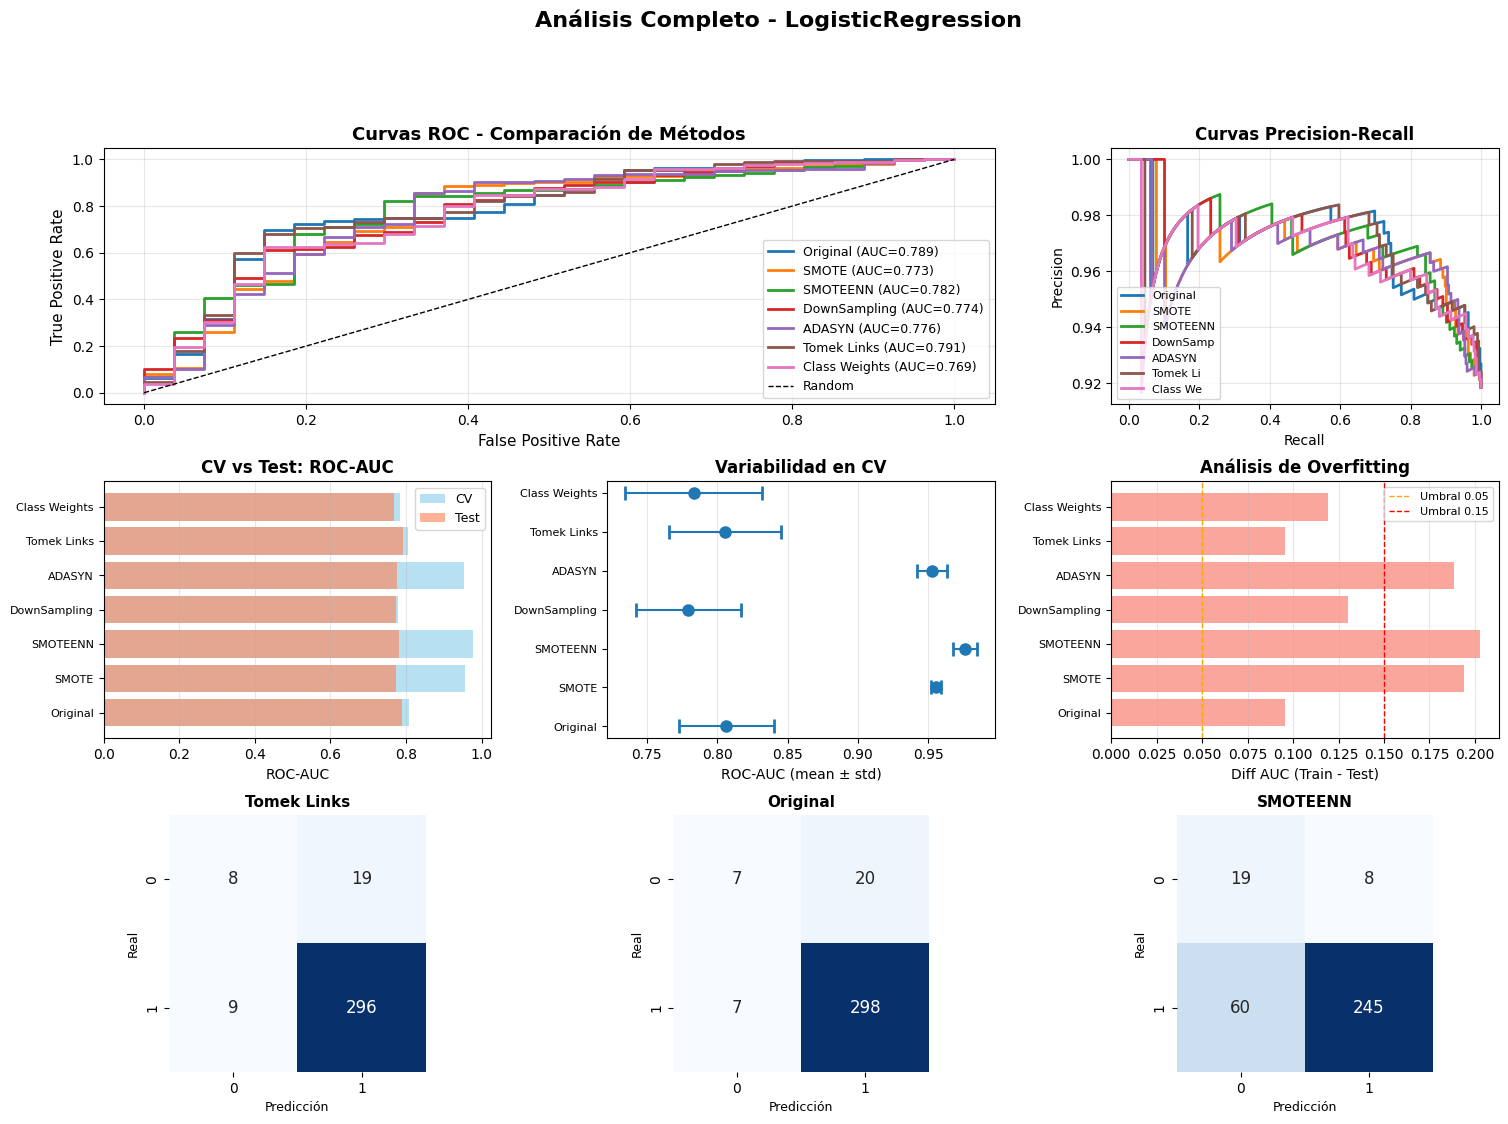

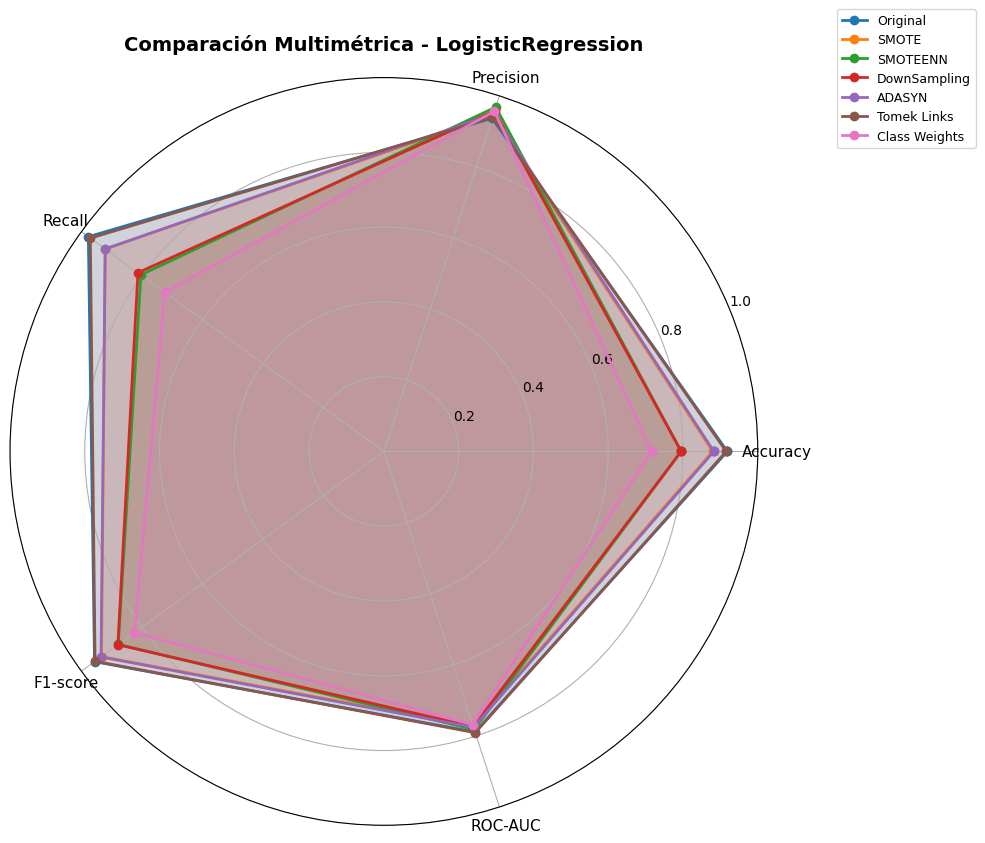


 📈 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.843373  0.075702  0.716867  0.795181  0.879518  0.899096   
Precision    7.0  0.950694  0.010987  0.937107  0.942905  0.949324  0.957119   
Recall       7.0  0.875878  0.096102  0.724590  0.808197  0.921311  0.945902   
F1-score     7.0  0.908908  0.049334  0.824627  0.878784  0.933555  0.944973   
ROC-AUC      7.0  0.779166  0.008512  0.768549  0.773588  0.775956  0.785732   

                max  
Accuracy   0.918675  
Precision  0.968379  
Recall     0.977049  
F1-score   0.956661  
ROC-AUC    0.791014  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.870940  0.075922  0.746827  0.838477  0.908638   
CV Precision    7.0  0.911018  0.051386  0.801341  0.912269  0.925134   
CV Recall       7.0  0.907161  0.075874  0.785921  0.860279  0.938491   
CV F1           7.0  0.90

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve,
                             confusion_matrix, precision_recall_curve, auc, make_scorer)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ===============================
# CONFIGURACIÓN DEL MODELO
# ===============================
# Descomenta el modelo que quieras usar:

MODELO_TIPO = "LogisticRegression"
# MODELO_TIPO = "DecisionTree"
# MODELO_TIPO = "RandomForest"
# MODELO_TIPO = "KNN"
# MODELO_TIPO = "SVM"
# MODELO_TIPO = "GradientBoosting"
# MODELO_TIPO = "XGBoost"

# Configuración de Cross-Validation
N_FOLDS = 5
RANDOM_STATE = 42

print("="*70)
print(f" ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - {MODELO_TIPO.upper()}")
print("="*70)
print(f" Cross-Validation: {N_FOLDS}-Fold Stratified")
print("="*70)

# ===============================
# FUNCIÓN PARA CREAR MODELOS
# ===============================
def crear_modelo(tipo, usar_class_weight=False):
    """Crea el modelo según el tipo especificado"""

    if tipo == "LogisticRegression":
        cw = 'balanced' if usar_class_weight else None
        return LogisticRegression(max_iter=1000, class_weight=cw, random_state=RANDOM_STATE)

    elif tipo == "DecisionTree":
        cw = 'balanced' if usar_class_weight else None
        return DecisionTreeClassifier(
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            min_samples_leaf=5
        )

    elif tipo == "RandomForest":
        cw = 'balanced' if usar_class_weight else None
        return RandomForestClassifier(
            n_estimators=100,
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            n_jobs=-1
        )

    elif tipo == "KNN":
        # KNN no soporta class_weight directamente
        return KNeighborsClassifier(
            n_neighbors=5,
            weights='distance',  # Pondera por distancia
            metric='minkowski',
            n_jobs=-1
        )

    elif tipo == "SVM":
        cw = 'balanced' if usar_class_weight else None
        return SVC(
            class_weight=cw,
            random_state=RANDOM_STATE,
            kernel='rbf',
            probability=True,  # Necesario para predict_proba
            C=1.0,
            gamma='scale'
        )

    elif tipo == "GradientBoosting":
        return GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=RANDOM_STATE,
            subsample=0.8
        )

    elif tipo == "XGBoost":
        # XGBoost usa scale_pos_weight en lugar de class_weight
        if usar_class_weight:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                scale_pos_weight=3,  # Ajusta según tu desbalance
                eval_metric='logloss',
                use_label_encoder=False
            )
        else:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                eval_metric='logloss',
                use_label_encoder=False
            )

# ===============================
# CONFIGURACIÓN DE DATASETS
# ===============================
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# Métricas para cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

resultados_train = []
resultados_test = []
resultados_cv = []
matrices_confusion = {}
curvas_pr = {}
modelos_entrenados = {}

# ===============================
# ENTRENAMIENTO Y EVALUACIÓN
# ===============================
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

for nombre, (X_tr, y_tr) in datasets.items():
    print(f"\n{'='*70}")
    print(f" ENTRENANDO: {nombre}")
    print(f"{'='*70}")

    # Crear modelo
    usar_cw = (nombre == "Class Weights")
    modelo = crear_modelo(MODELO_TIPO, usar_class_weight=usar_cw)

    # ===== CROSS-VALIDATION =====
    print("\n--- CROSS-VALIDATION (Train) ---")
    cv_results = {}

    for metric_name, metric_func in scoring.items():
        scores = cross_val_score(modelo, X_tr, y_tr, cv=skf, scoring=metric_func, n_jobs=-1)
        cv_results[metric_name] = scores
        print(f"{metric_name.upper():12s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    resultados_cv.append({
        "Método": nombre,
        "CV Accuracy": cv_results['accuracy'].mean(),
        "CV Accuracy Std": cv_results['accuracy'].std(),
        "CV Precision": cv_results['precision'].mean(),
        "CV Recall": cv_results['recall'].mean(),
        "CV F1": cv_results['f1'].mean(),
        "CV ROC-AUC": cv_results['roc_auc'].mean(),
        "CV ROC-AUC Std": cv_results['roc_auc'].std()
    })

    # Entrenar modelo final
    modelo.fit(X_tr, y_tr)
    modelos_entrenados[nombre] = modelo

    # ===== MÉTRICAS TRAIN =====
    y_pred_train = modelo.predict(X_tr)
    y_prob_train = modelo.predict_proba(X_tr)[:, 1]

    print("\n--- MÉTRICAS TRAIN (Full) ---")
    print(classification_report(y_tr, y_pred_train))

    resultados_train.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_tr, y_pred_train),
        "Precision": precision_score(y_tr, y_pred_train),
        "Recall": recall_score(y_tr, y_pred_train),
        "F1-score": f1_score(y_tr, y_pred_train),
        "ROC-AUC": roc_auc_score(y_tr, y_prob_train),
        "Tamaño": len(y_tr)
    })

    # ===== MÉTRICAS TEST =====
    y_pred_test = modelo.predict(X_test)
    y_prob_test = modelo.predict_proba(X_test)[:, 1]

    print("\n--- MÉTRICAS TEST ---")
    print(classification_report(y_test, y_pred_test))

    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0

    resultados_test.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-score": f1_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_prob_test),
        "Especificidad": especificidad
    })

    # Guardar matriz de confusión
    matrices_confusion[nombre] = cm

    # Guardar curva Precision-Recall
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob_test)
    curvas_pr[nombre] = (precision_vals, recall_vals, auc(recall_vals, precision_vals))

# ===============================
# DATAFRAMES DE RESULTADOS
# ===============================
df_train = pd.DataFrame(resultados_train)
df_test = pd.DataFrame(resultados_test)
df_cv = pd.DataFrame(resultados_cv)

print("\n" + "="*70)
print(" 📊 RESULTADOS CROSS-VALIDATION")
print("="*70)
print(df_cv.sort_values(by="CV ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TRAIN (Full)")
print("="*70)
print(df_train.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TEST")
print("="*70)
print(df_test.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

# ===============================
# ANÁLISIS DE OVERFITTING
# ===============================
print("\n" + "="*70)
print(" 🔍 ANÁLISIS DE OVERFITTING")
print("="*70)

overfitting_analysis = []
for i, row_train in df_train.iterrows():
    metodo = row_train['Método']
    row_test = df_test[df_test['Método'] == metodo].iloc[0]
    row_cv = df_cv[df_cv['Método'] == metodo].iloc[0]

    overfitting_analysis.append({
        'Método': metodo,
        'Train-Test (Acc)': row_train['Accuracy'] - row_test['Accuracy'],
        'Train-Test (AUC)': row_train['ROC-AUC'] - row_test['ROC-AUC'],
        'CV-Test (AUC)': row_cv['CV ROC-AUC'] - row_test['ROC-AUC'],
        'CV Std AUC': row_cv['CV ROC-AUC Std']
    })

df_overfit = pd.DataFrame(overfitting_analysis)
print(df_overfit.sort_values(by='Train-Test (AUC)').to_string(index=False))

# ===============================
# VISUALIZACIONES
# ===============================

# 1. PANEL PRINCIPAL
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Subplot 1: Curvas ROC
ax1 = fig.add_subplot(gs[0, :2])
for nombre, modelo in modelos_entrenados.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    ax1.plot(fpr, tpr, label=f'{nombre} (AUC={roc_auc:.3f})', linewidth=2)

ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=11)
ax1.set_ylabel('True Positive Rate', fontsize=11)
ax1.set_title('Curvas ROC - Comparación de Métodos', fontsize=13, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Subplot 2: Curvas Precision-Recall
ax2 = fig.add_subplot(gs[0, 2])
for nombre, (precision_vals, recall_vals, pr_auc) in curvas_pr.items():
    ax2.plot(recall_vals, precision_vals, label=f'{nombre[:8]}', linewidth=2)

ax2.set_xlabel('Recall', fontsize=10)
ax2.set_ylabel('Precision', fontsize=10)
ax2.set_title('Curvas Precision-Recall', fontsize=12, fontweight='bold')
ax2.legend(loc='lower left', fontsize=8)
ax2.grid(True, alpha=0.3)

# Subplot 3: Comparación CV vs Test
ax3 = fig.add_subplot(gs[1, 0])
metodos = df_cv['Método']
x_pos = np.arange(len(metodos))

ax3.barh(x_pos, df_cv['CV ROC-AUC'], alpha=0.6, label='CV', color='skyblue')
ax3.barh(x_pos, df_test['ROC-AUC'], alpha=0.6, label='Test', color='coral')
ax3.set_yticks(x_pos)
ax3.set_yticklabels(metodos, fontsize=8)
ax3.set_xlabel('ROC-AUC', fontsize=10)
ax3.set_title('CV vs Test: ROC-AUC', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Subplot 4: Variabilidad CV
ax4 = fig.add_subplot(gs[1, 1])
ax4.errorbar(df_cv['CV ROC-AUC'], x_pos, xerr=df_cv['CV ROC-AUC Std'],
             fmt='o', capsize=5, capthick=2, markersize=8)
ax4.set_yticks(x_pos)
ax4.set_yticklabels(metodos, fontsize=8)
ax4.set_xlabel('ROC-AUC (mean ± std)', fontsize=10)
ax4.set_title('Variabilidad en CV', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# Subplot 5: Overfitting
ax5 = fig.add_subplot(gs[1, 2])
ax5.barh(x_pos, df_overfit['Train-Test (AUC)'], alpha=0.7, color='salmon')
ax5.set_yticks(x_pos)
ax5.set_yticklabels(metodos, fontsize=8)
ax5.set_xlabel('Diff AUC (Train - Test)', fontsize=10)
ax5.set_title('Análisis de Overfitting', fontsize=12, fontweight='bold')
ax5.axvline(x=0.05, color='orange', linestyle='--', linewidth=1, label='Umbral 0.05')
ax5.axvline(x=0.15, color='red', linestyle='--', linewidth=1, label='Umbral 0.15')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3, axis='x')

# Subplot 6-8: Mejores 3 matrices de confusión
top3_metodos = df_test.nlargest(3, 'ROC-AUC')['Método'].tolist()
for idx, metodo in enumerate(top3_metodos):
    ax = fig.add_subplot(gs[2, idx])
    cm = matrices_confusion[metodo]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, square=True, annot_kws={'size': 12})
    ax.set_title(f'{metodo}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicción', fontsize=9)
    ax.set_ylabel('Real', fontsize=9)

plt.suptitle(f'Análisis Completo - {MODELO_TIPO}', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# 2. GRÁFICO RADAR COMPARATIVO
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categorias = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
N = len(categorias)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for metodo in df_test['Método']:
    valores = df_test[df_test['Método'] == metodo][categorias].values[0].tolist()
    valores += valores[:1]
    ax.plot(angles, valores, 'o-', linewidth=2, label=metodo)
    ax.fill(angles, valores, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, size=11)
ax.set_ylim(0, 1)
ax.set_title(f'Comparación Multimétrica - {MODELO_TIPO}', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# ESTADÍSTICAS DESCRIPTIVAS
# ===============================
print("\n" + "="*70)
print(" 📈 ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
print("\n--- TEST ---")
print(df_test[['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']].describe().T)
print("\n--- CROSS-VALIDATION ---")
print(df_cv[['CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1', 'CV ROC-AUC']].describe().T)

# ===============================
# RECOMENDACIONES
# ===============================
print("\n" + "="*70)
print(" 💡 RECOMENDACIONES FINALES")
print("="*70)

mejor_cv = df_cv.loc[df_cv['CV ROC-AUC'].idxmax()]
mejor_test = df_test.loc[df_test['ROC-AUC'].idxmax()]
mejor_recall = df_test.loc[df_test['Recall'].idxmax()]
mejor_precision = df_test.loc[df_test['Precision'].idxmax()]
mejor_f1 = df_test.loc[df_test['F1-score'].idxmax()]
menos_overfit = df_overfit.loc[df_overfit['Train-Test (AUC)'].idxmin()]
mas_estable = df_cv.loc[df_cv['CV ROC-AUC Std'].idxmin()]

print(f"\n🏆 MEJOR RENDIMIENTO:")
print(f"  • CV ROC-AUC: {mejor_cv['Método']} ({mejor_cv['CV ROC-AUC']:.4f} ± {mejor_cv['CV ROC-AUC Std']:.4f})")
print(f"  • Test ROC-AUC: {mejor_test['Método']} ({mejor_test['ROC-AUC']:.4f})")
print(f"  • Recall: {mejor_recall['Método']} ({mejor_recall['Recall']:.4f})")
print(f"  • Precision: {mejor_precision['Método']} ({mejor_precision['Precision']:.4f})")
print(f"  • F1-Score: {mejor_f1['Método']} ({mejor_f1['F1-score']:.4f})")

print(f"\n🎯 GENERALIZACIÓN:")
print(f"  • Menor Overfitting: {menos_overfit['Método']} (diff={menos_overfit['Train-Test (AUC)']:.4f})")
print(f"  • Mayor Estabilidad CV: {mas_estable['Método']} (std={mas_estable['CV ROC-AUC Std']:.4f})")

print("\n" + "="*70)

### Arboles de decision

 ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - DECISIONTREE
 Cross-Validation: 5-Fold Stratified

 ENTRENANDO: Original

--- CROSS-VALIDATION (Train) ---
ACCURACY    : 0.9066 (+/- 0.0148)
PRECISION   : 0.9377 (+/- 0.0068)
RECALL      : 0.9623 (+/- 0.0154)
F1          : 0.9498 (+/- 0.0082)
ROC_AUC     : 0.6234 (+/- 0.0494)

--- MÉTRICAS TRAIN (Full) ---
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       108
           1       0.97      0.98      0.98      1219

    accuracy                           0.95      1327
   macro avg       0.87      0.80      0.83      1327
weighted avg       0.95      0.95      0.95      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.33      0.30      0.31        27
           1       0.94      0.95      0.94       305

    accuracy                           0.89       332
   macro avg       0.64      0.62      0.63       332
weighted avg       0.89  

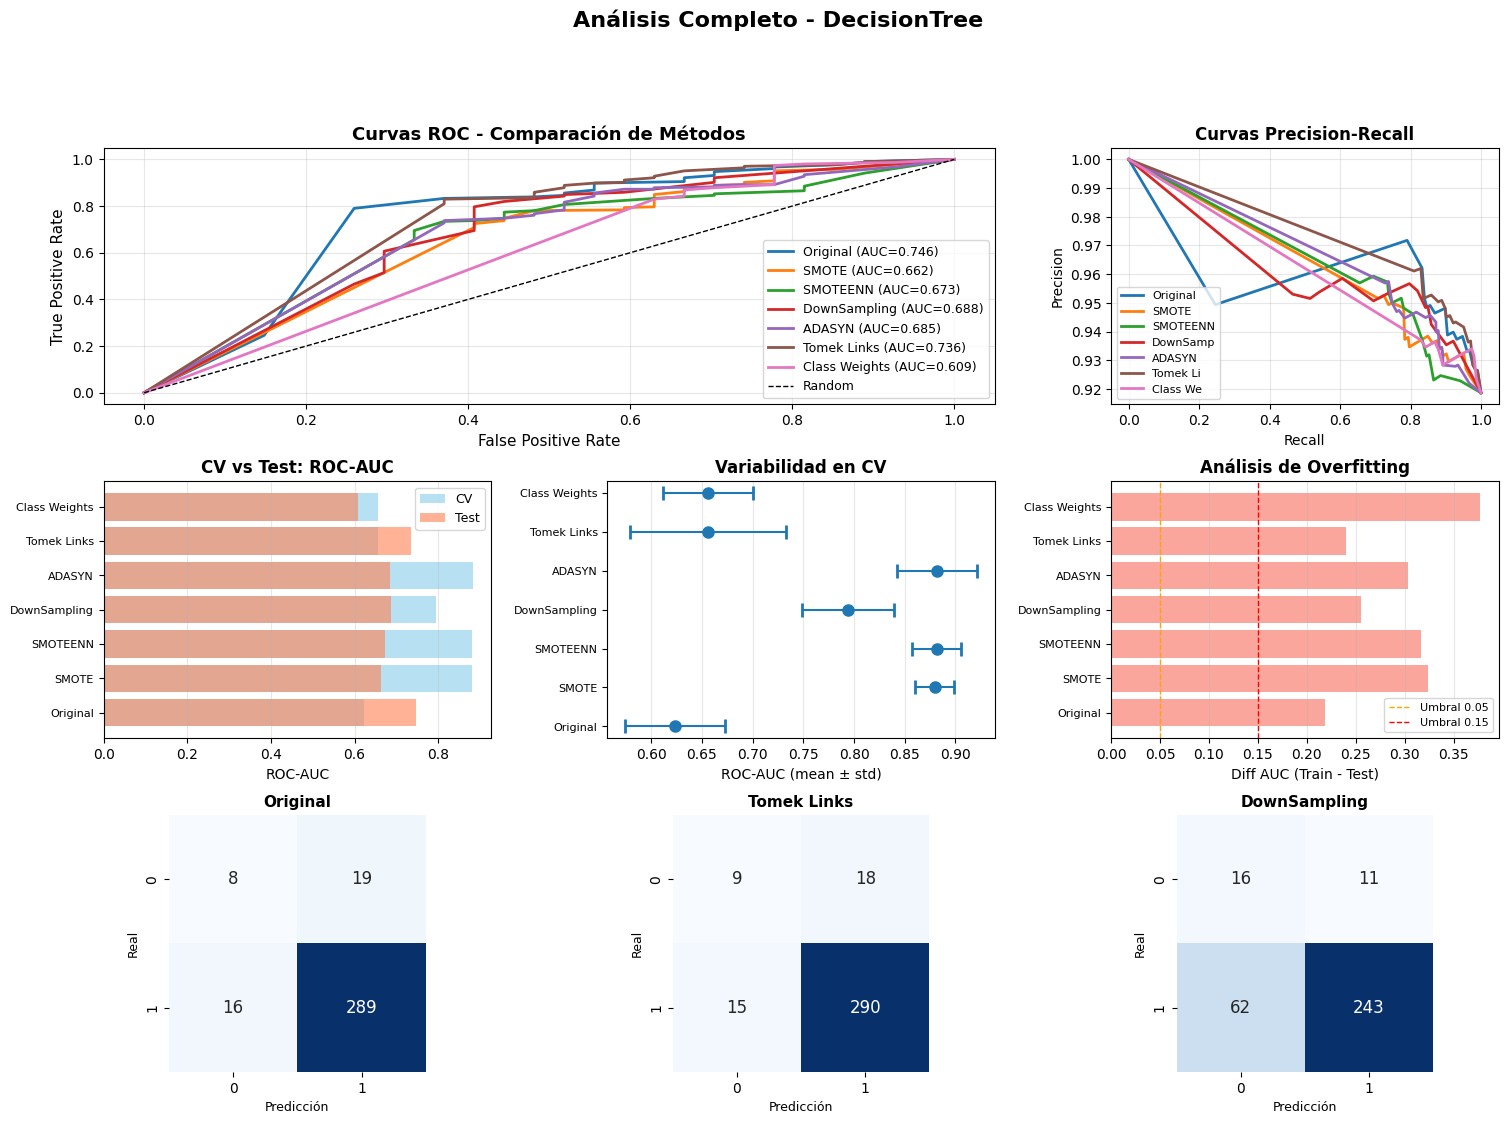

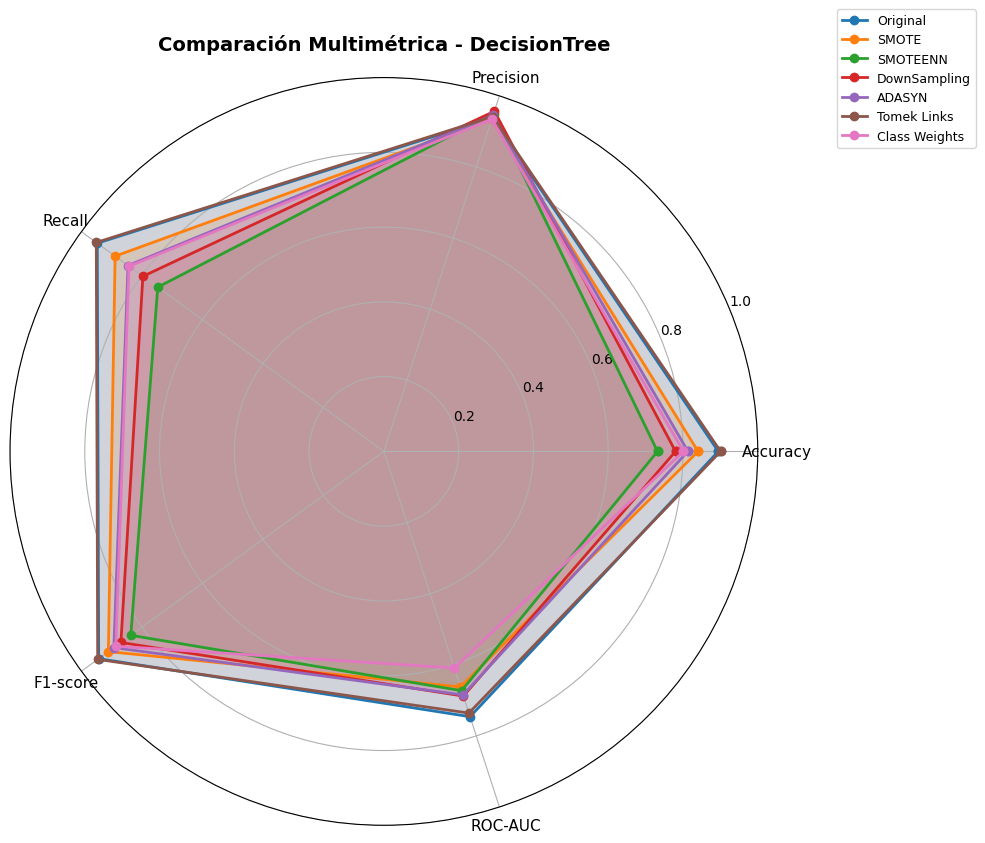


 📈 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.823150  0.060759  0.731928  0.790663  0.813253  0.867470   
Precision    7.0  0.942949  0.008254  0.934483  0.936429  0.941558  0.947527   
Recall       7.0  0.859953  0.075141  0.747541  0.819672  0.845902  0.918033   
F1-score     7.0  0.897863  0.039255  0.836697  0.877808  0.892734  0.926914   
ROC-AUC      7.0  0.685593  0.046097  0.609107  0.667577  0.684882  0.711961   

                max  
Accuracy   0.900602  
Precision  0.956693  
Recall     0.950820  
F1-score   0.946166  
ROC-AUC    0.746084  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.848095  0.047340  0.768365  0.830680  0.845199   
CV Precision    7.0  0.890387  0.054055  0.819650  0.850034  0.892814   
CV Recall       7.0  0.875259  0.071015  0.753738  0.852000  0.872860   
CV F1           7.0  0.88

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve,
                             confusion_matrix, precision_recall_curve, auc, make_scorer)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ===============================
# CONFIGURACIÓN DEL MODELO
# ===============================
# Descomenta el modelo que quieras usar:

# MODELO_TIPO = "LogisticRegression"
MODELO_TIPO = "DecisionTree"
# MODELO_TIPO = "RandomForest"
# MODELO_TIPO = "KNN"
# MODELO_TIPO = "SVM"
# MODELO_TIPO = "GradientBoosting"
# MODELO_TIPO = "XGBoost"

# Configuración de Cross-Validation
N_FOLDS = 5
RANDOM_STATE = 42

print("="*70)
print(f" ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - {MODELO_TIPO.upper()}")
print("="*70)
print(f" Cross-Validation: {N_FOLDS}-Fold Stratified")
print("="*70)

# ===============================
# FUNCIÓN PARA CREAR MODELOS
# ===============================
def crear_modelo(tipo, usar_class_weight=False):
    """Crea el modelo según el tipo especificado"""

    if tipo == "LogisticRegression":
        cw = 'balanced' if usar_class_weight else None
        return LogisticRegression(max_iter=1000, class_weight=cw, random_state=RANDOM_STATE)

    elif tipo == "DecisionTree":
        cw = 'balanced' if usar_class_weight else None
        return DecisionTreeClassifier(
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            min_samples_leaf=5
        )

    elif tipo == "RandomForest":
        cw = 'balanced' if usar_class_weight else None
        return RandomForestClassifier(
            n_estimators=100,
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            n_jobs=-1
        )

    elif tipo == "KNN":
        # KNN no soporta class_weight directamente
        return KNeighborsClassifier(
            n_neighbors=5,
            weights='distance',  # Pondera por distancia
            metric='minkowski',
            n_jobs=-1
        )

    elif tipo == "SVM":
        cw = 'balanced' if usar_class_weight else None
        return SVC(
            class_weight=cw,
            random_state=RANDOM_STATE,
            kernel='rbf',
            probability=True,  # Necesario para predict_proba
            C=1.0,
            gamma='scale'
        )

    elif tipo == "GradientBoosting":
        return GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=RANDOM_STATE,
            subsample=0.8
        )

    elif tipo == "XGBoost":
        # XGBoost usa scale_pos_weight en lugar de class_weight
        if usar_class_weight:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                scale_pos_weight=3,  # Ajusta según tu desbalance
                eval_metric='logloss',
                use_label_encoder=False
            )
        else:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                eval_metric='logloss',
                use_label_encoder=False
            )

# ===============================
# CONFIGURACIÓN DE DATASETS
# ===============================
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# Métricas para cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

resultados_train = []
resultados_test = []
resultados_cv = []
matrices_confusion = {}
curvas_pr = {}
modelos_entrenados = {}

# ===============================
# ENTRENAMIENTO Y EVALUACIÓN
# ===============================
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

for nombre, (X_tr, y_tr) in datasets.items():
    print(f"\n{'='*70}")
    print(f" ENTRENANDO: {nombre}")
    print(f"{'='*70}")

    # Crear modelo
    usar_cw = (nombre == "Class Weights")
    modelo = crear_modelo(MODELO_TIPO, usar_class_weight=usar_cw)

    # ===== CROSS-VALIDATION =====
    print("\n--- CROSS-VALIDATION (Train) ---")
    cv_results = {}

    for metric_name, metric_func in scoring.items():
        scores = cross_val_score(modelo, X_tr, y_tr, cv=skf, scoring=metric_func, n_jobs=-1)
        cv_results[metric_name] = scores
        print(f"{metric_name.upper():12s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    resultados_cv.append({
        "Método": nombre,
        "CV Accuracy": cv_results['accuracy'].mean(),
        "CV Accuracy Std": cv_results['accuracy'].std(),
        "CV Precision": cv_results['precision'].mean(),
        "CV Recall": cv_results['recall'].mean(),
        "CV F1": cv_results['f1'].mean(),
        "CV ROC-AUC": cv_results['roc_auc'].mean(),
        "CV ROC-AUC Std": cv_results['roc_auc'].std()
    })

    # Entrenar modelo final
    modelo.fit(X_tr, y_tr)
    modelos_entrenados[nombre] = modelo

    # ===== MÉTRICAS TRAIN =====
    y_pred_train = modelo.predict(X_tr)
    y_prob_train = modelo.predict_proba(X_tr)[:, 1]

    print("\n--- MÉTRICAS TRAIN (Full) ---")
    print(classification_report(y_tr, y_pred_train))

    resultados_train.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_tr, y_pred_train),
        "Precision": precision_score(y_tr, y_pred_train),
        "Recall": recall_score(y_tr, y_pred_train),
        "F1-score": f1_score(y_tr, y_pred_train),
        "ROC-AUC": roc_auc_score(y_tr, y_prob_train),
        "Tamaño": len(y_tr)
    })

    # ===== MÉTRICAS TEST =====
    y_pred_test = modelo.predict(X_test)
    y_prob_test = modelo.predict_proba(X_test)[:, 1]

    print("\n--- MÉTRICAS TEST ---")
    print(classification_report(y_test, y_pred_test))

    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0

    resultados_test.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-score": f1_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_prob_test),
        "Especificidad": especificidad
    })

    # Guardar matriz de confusión
    matrices_confusion[nombre] = cm

    # Guardar curva Precision-Recall
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob_test)
    curvas_pr[nombre] = (precision_vals, recall_vals, auc(recall_vals, precision_vals))

# ===============================
# DATAFRAMES DE RESULTADOS
# ===============================
df_train = pd.DataFrame(resultados_train)
df_test = pd.DataFrame(resultados_test)
df_cv = pd.DataFrame(resultados_cv)

print("\n" + "="*70)
print(" 📊 RESULTADOS CROSS-VALIDATION")
print("="*70)
print(df_cv.sort_values(by="CV ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TRAIN (Full)")
print("="*70)
print(df_train.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TEST")
print("="*70)
print(df_test.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

# ===============================
# ANÁLISIS DE OVERFITTING
# ===============================
print("\n" + "="*70)
print(" 🔍 ANÁLISIS DE OVERFITTING")
print("="*70)

overfitting_analysis = []
for i, row_train in df_train.iterrows():
    metodo = row_train['Método']
    row_test = df_test[df_test['Método'] == metodo].iloc[0]
    row_cv = df_cv[df_cv['Método'] == metodo].iloc[0]

    overfitting_analysis.append({
        'Método': metodo,
        'Train-Test (Acc)': row_train['Accuracy'] - row_test['Accuracy'],
        'Train-Test (AUC)': row_train['ROC-AUC'] - row_test['ROC-AUC'],
        'CV-Test (AUC)': row_cv['CV ROC-AUC'] - row_test['ROC-AUC'],
        'CV Std AUC': row_cv['CV ROC-AUC Std']
    })

df_overfit = pd.DataFrame(overfitting_analysis)
print(df_overfit.sort_values(by='Train-Test (AUC)').to_string(index=False))

# ===============================
# VISUALIZACIONES
# ===============================

# 1. PANEL PRINCIPAL
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Subplot 1: Curvas ROC
ax1 = fig.add_subplot(gs[0, :2])
for nombre, modelo in modelos_entrenados.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    ax1.plot(fpr, tpr, label=f'{nombre} (AUC={roc_auc:.3f})', linewidth=2)

ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=11)
ax1.set_ylabel('True Positive Rate', fontsize=11)
ax1.set_title('Curvas ROC - Comparación de Métodos', fontsize=13, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Subplot 2: Curvas Precision-Recall
ax2 = fig.add_subplot(gs[0, 2])
for nombre, (precision_vals, recall_vals, pr_auc) in curvas_pr.items():
    ax2.plot(recall_vals, precision_vals, label=f'{nombre[:8]}', linewidth=2)

ax2.set_xlabel('Recall', fontsize=10)
ax2.set_ylabel('Precision', fontsize=10)
ax2.set_title('Curvas Precision-Recall', fontsize=12, fontweight='bold')
ax2.legend(loc='lower left', fontsize=8)
ax2.grid(True, alpha=0.3)

# Subplot 3: Comparación CV vs Test
ax3 = fig.add_subplot(gs[1, 0])
metodos = df_cv['Método']
x_pos = np.arange(len(metodos))

ax3.barh(x_pos, df_cv['CV ROC-AUC'], alpha=0.6, label='CV', color='skyblue')
ax3.barh(x_pos, df_test['ROC-AUC'], alpha=0.6, label='Test', color='coral')
ax3.set_yticks(x_pos)
ax3.set_yticklabels(metodos, fontsize=8)
ax3.set_xlabel('ROC-AUC', fontsize=10)
ax3.set_title('CV vs Test: ROC-AUC', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Subplot 4: Variabilidad CV
ax4 = fig.add_subplot(gs[1, 1])
ax4.errorbar(df_cv['CV ROC-AUC'], x_pos, xerr=df_cv['CV ROC-AUC Std'],
             fmt='o', capsize=5, capthick=2, markersize=8)
ax4.set_yticks(x_pos)
ax4.set_yticklabels(metodos, fontsize=8)
ax4.set_xlabel('ROC-AUC (mean ± std)', fontsize=10)
ax4.set_title('Variabilidad en CV', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# Subplot 5: Overfitting
ax5 = fig.add_subplot(gs[1, 2])
ax5.barh(x_pos, df_overfit['Train-Test (AUC)'], alpha=0.7, color='salmon')
ax5.set_yticks(x_pos)
ax5.set_yticklabels(metodos, fontsize=8)
ax5.set_xlabel('Diff AUC (Train - Test)', fontsize=10)
ax5.set_title('Análisis de Overfitting', fontsize=12, fontweight='bold')
ax5.axvline(x=0.05, color='orange', linestyle='--', linewidth=1, label='Umbral 0.05')
ax5.axvline(x=0.15, color='red', linestyle='--', linewidth=1, label='Umbral 0.15')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3, axis='x')

# Subplot 6-8: Mejores 3 matrices de confusión
top3_metodos = df_test.nlargest(3, 'ROC-AUC')['Método'].tolist()
for idx, metodo in enumerate(top3_metodos):
    ax = fig.add_subplot(gs[2, idx])
    cm = matrices_confusion[metodo]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, square=True, annot_kws={'size': 12})
    ax.set_title(f'{metodo}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicción', fontsize=9)
    ax.set_ylabel('Real', fontsize=9)

plt.suptitle(f'Análisis Completo - {MODELO_TIPO}', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# 2. GRÁFICO RADAR COMPARATIVO
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categorias = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
N = len(categorias)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for metodo in df_test['Método']:
    valores = df_test[df_test['Método'] == metodo][categorias].values[0].tolist()
    valores += valores[:1]
    ax.plot(angles, valores, 'o-', linewidth=2, label=metodo)
    ax.fill(angles, valores, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, size=11)
ax.set_ylim(0, 1)
ax.set_title(f'Comparación Multimétrica - {MODELO_TIPO}', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# ESTADÍSTICAS DESCRIPTIVAS
# ===============================
print("\n" + "="*70)
print(" 📈 ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
print("\n--- TEST ---")
print(df_test[['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']].describe().T)
print("\n--- CROSS-VALIDATION ---")
print(df_cv[['CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1', 'CV ROC-AUC']].describe().T)

# ===============================
# RECOMENDACIONES
# ===============================
print("\n" + "="*70)
print(" 💡 RECOMENDACIONES FINALES")
print("="*70)

mejor_cv = df_cv.loc[df_cv['CV ROC-AUC'].idxmax()]
mejor_test = df_test.loc[df_test['ROC-AUC'].idxmax()]
mejor_recall = df_test.loc[df_test['Recall'].idxmax()]
mejor_precision = df_test.loc[df_test['Precision'].idxmax()]
mejor_f1 = df_test.loc[df_test['F1-score'].idxmax()]
menos_overfit = df_overfit.loc[df_overfit['Train-Test (AUC)'].idxmin()]
mas_estable = df_cv.loc[df_cv['CV ROC-AUC Std'].idxmin()]

print(f"\n🏆 MEJOR RENDIMIENTO:")
print(f"  • CV ROC-AUC: {mejor_cv['Método']} ({mejor_cv['CV ROC-AUC']:.4f} ± {mejor_cv['CV ROC-AUC Std']:.4f})")
print(f"  • Test ROC-AUC: {mejor_test['Método']} ({mejor_test['ROC-AUC']:.4f})")
print(f"  • Recall: {mejor_recall['Método']} ({mejor_recall['Recall']:.4f})")
print(f"  • Precision: {mejor_precision['Método']} ({mejor_precision['Precision']:.4f})")
print(f"  • F1-Score: {mejor_f1['Método']} ({mejor_f1['F1-score']:.4f})")

print(f"\n🎯 GENERALIZACIÓN:")
print(f"  • Menor Overfitting: {menos_overfit['Método']} (diff={menos_overfit['Train-Test (AUC)']:.4f})")
print(f"  • Mayor Estabilidad CV: {mas_estable['Método']} (std={mas_estable['CV ROC-AUC Std']:.4f})")

print("\n" + "="*70)

### Random Forest

 ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - RANDOMFOREST
 Cross-Validation: 5-Fold Stratified

 ENTRENANDO: Original

--- CROSS-VALIDATION (Train) ---
ACCURACY    : 0.9194 (+/- 0.0018)
PRECISION   : 0.9193 (+/- 0.0018)
RECALL      : 1.0000 (+/- 0.0000)
F1          : 0.9580 (+/- 0.0010)
ROC_AUC     : 0.8012 (+/- 0.0301)

--- MÉTRICAS TRAIN (Full) ---
              precision    recall  f1-score   support

           0       1.00      0.26      0.41       108
           1       0.94      1.00      0.97      1219

    accuracy                           0.94      1327
   macro avg       0.97      0.63      0.69      1327
weighted avg       0.94      0.94      0.92      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.92      1.00      0.96       305

    accuracy                           0.92       332
   macro avg       0.46      0.50      0.48       332
weighted avg       0.84  

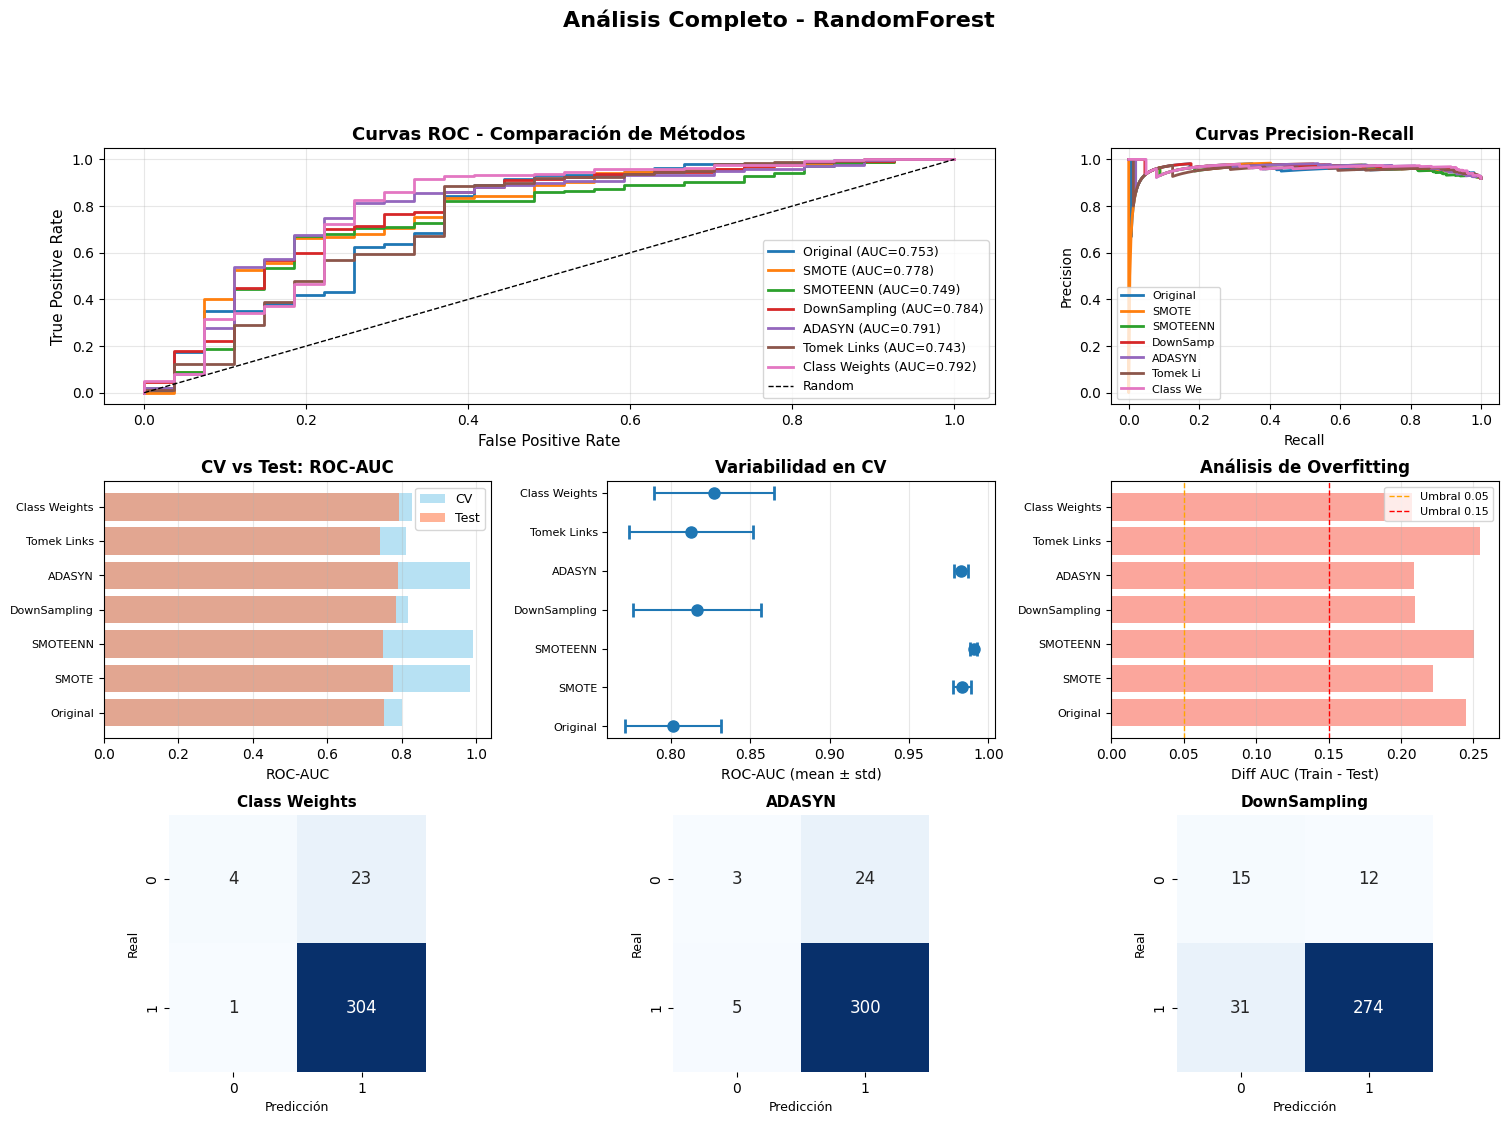

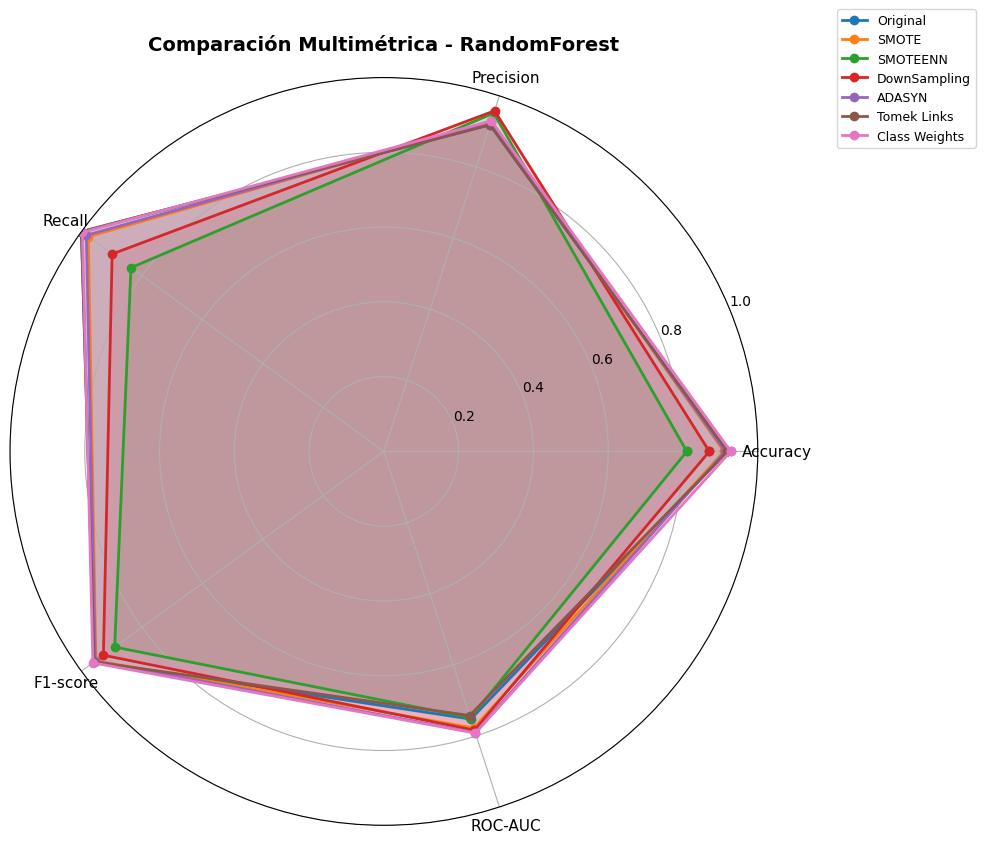


 📈 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.895439  0.041834  0.810241  0.890060  0.912651  0.918675   
Precision    7.0  0.932975  0.015611  0.918675  0.922300  0.928349  0.940578   
Recall       7.0  0.955972  0.063825  0.836066  0.937705  0.983607  0.998361   
F1-score     7.0  0.942931  0.025955  0.890052  0.939659  0.953895  0.957614   
ROC-AUC      7.0  0.769902  0.021010  0.742805  0.750941  0.777778  0.787371   

                max  
Accuracy   0.927711  
Precision  0.958042  
Recall     1.000000  
F1-score   0.962025  
ROC-AUC    0.792107  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.906128  0.052513  0.790144  0.916049  0.919367   
CV Precision    7.0  0.901908  0.050262  0.796910  0.898474  0.917249   
CV Recall       7.0  0.972673  0.041196  0.904383  0.957087  0.992613   
CV F1           7.0  0.93

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve,
                             confusion_matrix, precision_recall_curve, auc, make_scorer)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ===============================
# CONFIGURACIÓN DEL MODELO
# ===============================
# Descomenta el modelo que quieras usar:

# MODELO_TIPO = "LogisticRegression"
# MODELO_TIPO = "DecisionTree"
MODELO_TIPO = "RandomForest"
# MODELO_TIPO = "KNN"
# MODELO_TIPO = "SVM"
# MODELO_TIPO = "GradientBoosting"
# MODELO_TIPO = "XGBoost"

# Configuración de Cross-Validation
N_FOLDS = 5
RANDOM_STATE = 42

print("="*70)
print(f" ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - {MODELO_TIPO.upper()}")
print("="*70)
print(f" Cross-Validation: {N_FOLDS}-Fold Stratified")
print("="*70)

# ===============================
# FUNCIÓN PARA CREAR MODELOS
# ===============================
def crear_modelo(tipo, usar_class_weight=False):
    """Crea el modelo según el tipo especificado"""

    if tipo == "LogisticRegression":
        cw = 'balanced' if usar_class_weight else None
        return LogisticRegression(max_iter=1000, class_weight=cw, random_state=RANDOM_STATE)

    elif tipo == "DecisionTree":
        cw = 'balanced' if usar_class_weight else None
        return DecisionTreeClassifier(
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            min_samples_leaf=5
        )

    elif tipo == "RandomForest":
        cw = 'balanced' if usar_class_weight else None
        return RandomForestClassifier(
            n_estimators=100,
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            n_jobs=-1
        )

    elif tipo == "KNN":
        # KNN no soporta class_weight directamente
        return KNeighborsClassifier(
            n_neighbors=5,
            weights='distance',  # Pondera por distancia
            metric='minkowski',
            n_jobs=-1
        )

    elif tipo == "SVM":
        cw = 'balanced' if usar_class_weight else None
        return SVC(
            class_weight=cw,
            random_state=RANDOM_STATE,
            kernel='rbf',
            probability=True,  # Necesario para predict_proba
            C=1.0,
            gamma='scale'
        )

    elif tipo == "GradientBoosting":
        return GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=RANDOM_STATE,
            subsample=0.8
        )

    elif tipo == "XGBoost":
        # XGBoost usa scale_pos_weight en lugar de class_weight
        if usar_class_weight:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                scale_pos_weight=3,  # Ajusta según tu desbalance
                eval_metric='logloss',
                use_label_encoder=False
            )
        else:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                eval_metric='logloss',
                use_label_encoder=False
            )

# ===============================
# CONFIGURACIÓN DE DATASETS
# ===============================
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# Métricas para cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

resultados_train = []
resultados_test = []
resultados_cv = []
matrices_confusion = {}
curvas_pr = {}
modelos_entrenados = {}

# ===============================
# ENTRENAMIENTO Y EVALUACIÓN
# ===============================
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

for nombre, (X_tr, y_tr) in datasets.items():
    print(f"\n{'='*70}")
    print(f" ENTRENANDO: {nombre}")
    print(f"{'='*70}")

    # Crear modelo
    usar_cw = (nombre == "Class Weights")
    modelo = crear_modelo(MODELO_TIPO, usar_class_weight=usar_cw)

    # ===== CROSS-VALIDATION =====
    print("\n--- CROSS-VALIDATION (Train) ---")
    cv_results = {}

    for metric_name, metric_func in scoring.items():
        scores = cross_val_score(modelo, X_tr, y_tr, cv=skf, scoring=metric_func, n_jobs=-1)
        cv_results[metric_name] = scores
        print(f"{metric_name.upper():12s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    resultados_cv.append({
        "Método": nombre,
        "CV Accuracy": cv_results['accuracy'].mean(),
        "CV Accuracy Std": cv_results['accuracy'].std(),
        "CV Precision": cv_results['precision'].mean(),
        "CV Recall": cv_results['recall'].mean(),
        "CV F1": cv_results['f1'].mean(),
        "CV ROC-AUC": cv_results['roc_auc'].mean(),
        "CV ROC-AUC Std": cv_results['roc_auc'].std()
    })

    # Entrenar modelo final
    modelo.fit(X_tr, y_tr)
    modelos_entrenados[nombre] = modelo

    # ===== MÉTRICAS TRAIN =====
    y_pred_train = modelo.predict(X_tr)
    y_prob_train = modelo.predict_proba(X_tr)[:, 1]

    print("\n--- MÉTRICAS TRAIN (Full) ---")
    print(classification_report(y_tr, y_pred_train))

    resultados_train.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_tr, y_pred_train),
        "Precision": precision_score(y_tr, y_pred_train),
        "Recall": recall_score(y_tr, y_pred_train),
        "F1-score": f1_score(y_tr, y_pred_train),
        "ROC-AUC": roc_auc_score(y_tr, y_prob_train),
        "Tamaño": len(y_tr)
    })

    # ===== MÉTRICAS TEST =====
    y_pred_test = modelo.predict(X_test)
    y_prob_test = modelo.predict_proba(X_test)[:, 1]

    print("\n--- MÉTRICAS TEST ---")
    print(classification_report(y_test, y_pred_test))

    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0

    resultados_test.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-score": f1_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_prob_test),
        "Especificidad": especificidad
    })

    # Guardar matriz de confusión
    matrices_confusion[nombre] = cm

    # Guardar curva Precision-Recall
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob_test)
    curvas_pr[nombre] = (precision_vals, recall_vals, auc(recall_vals, precision_vals))

# ===============================
# DATAFRAMES DE RESULTADOS
# ===============================
df_train = pd.DataFrame(resultados_train)
df_test = pd.DataFrame(resultados_test)
df_cv = pd.DataFrame(resultados_cv)

print("\n" + "="*70)
print(" 📊 RESULTADOS CROSS-VALIDATION")
print("="*70)
print(df_cv.sort_values(by="CV ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TRAIN (Full)")
print("="*70)
print(df_train.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TEST")
print("="*70)
print(df_test.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

# ===============================
# ANÁLISIS DE OVERFITTING
# ===============================
print("\n" + "="*70)
print(" 🔍 ANÁLISIS DE OVERFITTING")
print("="*70)

overfitting_analysis = []
for i, row_train in df_train.iterrows():
    metodo = row_train['Método']
    row_test = df_test[df_test['Método'] == metodo].iloc[0]
    row_cv = df_cv[df_cv['Método'] == metodo].iloc[0]

    overfitting_analysis.append({
        'Método': metodo,
        'Train-Test (Acc)': row_train['Accuracy'] - row_test['Accuracy'],
        'Train-Test (AUC)': row_train['ROC-AUC'] - row_test['ROC-AUC'],
        'CV-Test (AUC)': row_cv['CV ROC-AUC'] - row_test['ROC-AUC'],
        'CV Std AUC': row_cv['CV ROC-AUC Std']
    })

df_overfit = pd.DataFrame(overfitting_analysis)
print(df_overfit.sort_values(by='Train-Test (AUC)').to_string(index=False))

# ===============================
# VISUALIZACIONES
# ===============================

# 1. PANEL PRINCIPAL
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Subplot 1: Curvas ROC
ax1 = fig.add_subplot(gs[0, :2])
for nombre, modelo in modelos_entrenados.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    ax1.plot(fpr, tpr, label=f'{nombre} (AUC={roc_auc:.3f})', linewidth=2)

ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=11)
ax1.set_ylabel('True Positive Rate', fontsize=11)
ax1.set_title('Curvas ROC - Comparación de Métodos', fontsize=13, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Subplot 2: Curvas Precision-Recall
ax2 = fig.add_subplot(gs[0, 2])
for nombre, (precision_vals, recall_vals, pr_auc) in curvas_pr.items():
    ax2.plot(recall_vals, precision_vals, label=f'{nombre[:8]}', linewidth=2)

ax2.set_xlabel('Recall', fontsize=10)
ax2.set_ylabel('Precision', fontsize=10)
ax2.set_title('Curvas Precision-Recall', fontsize=12, fontweight='bold')
ax2.legend(loc='lower left', fontsize=8)
ax2.grid(True, alpha=0.3)

# Subplot 3: Comparación CV vs Test
ax3 = fig.add_subplot(gs[1, 0])
metodos = df_cv['Método']
x_pos = np.arange(len(metodos))

ax3.barh(x_pos, df_cv['CV ROC-AUC'], alpha=0.6, label='CV', color='skyblue')
ax3.barh(x_pos, df_test['ROC-AUC'], alpha=0.6, label='Test', color='coral')
ax3.set_yticks(x_pos)
ax3.set_yticklabels(metodos, fontsize=8)
ax3.set_xlabel('ROC-AUC', fontsize=10)
ax3.set_title('CV vs Test: ROC-AUC', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Subplot 4: Variabilidad CV
ax4 = fig.add_subplot(gs[1, 1])
ax4.errorbar(df_cv['CV ROC-AUC'], x_pos, xerr=df_cv['CV ROC-AUC Std'],
             fmt='o', capsize=5, capthick=2, markersize=8)
ax4.set_yticks(x_pos)
ax4.set_yticklabels(metodos, fontsize=8)
ax4.set_xlabel('ROC-AUC (mean ± std)', fontsize=10)
ax4.set_title('Variabilidad en CV', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# Subplot 5: Overfitting
ax5 = fig.add_subplot(gs[1, 2])
ax5.barh(x_pos, df_overfit['Train-Test (AUC)'], alpha=0.7, color='salmon')
ax5.set_yticks(x_pos)
ax5.set_yticklabels(metodos, fontsize=8)
ax5.set_xlabel('Diff AUC (Train - Test)', fontsize=10)
ax5.set_title('Análisis de Overfitting', fontsize=12, fontweight='bold')
ax5.axvline(x=0.05, color='orange', linestyle='--', linewidth=1, label='Umbral 0.05')
ax5.axvline(x=0.15, color='red', linestyle='--', linewidth=1, label='Umbral 0.15')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3, axis='x')

# Subplot 6-8: Mejores 3 matrices de confusión
top3_metodos = df_test.nlargest(3, 'ROC-AUC')['Método'].tolist()
for idx, metodo in enumerate(top3_metodos):
    ax = fig.add_subplot(gs[2, idx])
    cm = matrices_confusion[metodo]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, square=True, annot_kws={'size': 12})
    ax.set_title(f'{metodo}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicción', fontsize=9)
    ax.set_ylabel('Real', fontsize=9)

plt.suptitle(f'Análisis Completo - {MODELO_TIPO}', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# 2. GRÁFICO RADAR COMPARATIVO
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categorias = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
N = len(categorias)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for metodo in df_test['Método']:
    valores = df_test[df_test['Método'] == metodo][categorias].values[0].tolist()
    valores += valores[:1]
    ax.plot(angles, valores, 'o-', linewidth=2, label=metodo)
    ax.fill(angles, valores, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, size=11)
ax.set_ylim(0, 1)
ax.set_title(f'Comparación Multimétrica - {MODELO_TIPO}', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# ESTADÍSTICAS DESCRIPTIVAS
# ===============================
print("\n" + "="*70)
print(" 📈 ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
print("\n--- TEST ---")
print(df_test[['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']].describe().T)
print("\n--- CROSS-VALIDATION ---")
print(df_cv[['CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1', 'CV ROC-AUC']].describe().T)

# ===============================
# RECOMENDACIONES
# ===============================
print("\n" + "="*70)
print(" 💡 RECOMENDACIONES FINALES")
print("="*70)

mejor_cv = df_cv.loc[df_cv['CV ROC-AUC'].idxmax()]
mejor_test = df_test.loc[df_test['ROC-AUC'].idxmax()]
mejor_recall = df_test.loc[df_test['Recall'].idxmax()]
mejor_precision = df_test.loc[df_test['Precision'].idxmax()]
mejor_f1 = df_test.loc[df_test['F1-score'].idxmax()]
menos_overfit = df_overfit.loc[df_overfit['Train-Test (AUC)'].idxmin()]
mas_estable = df_cv.loc[df_cv['CV ROC-AUC Std'].idxmin()]

print(f"\n🏆 MEJOR RENDIMIENTO:")
print(f"  • CV ROC-AUC: {mejor_cv['Método']} ({mejor_cv['CV ROC-AUC']:.4f} ± {mejor_cv['CV ROC-AUC Std']:.4f})")
print(f"  • Test ROC-AUC: {mejor_test['Método']} ({mejor_test['ROC-AUC']:.4f})")
print(f"  • Recall: {mejor_recall['Método']} ({mejor_recall['Recall']:.4f})")
print(f"  • Precision: {mejor_precision['Método']} ({mejor_precision['Precision']:.4f})")
print(f"  • F1-Score: {mejor_f1['Método']} ({mejor_f1['F1-score']:.4f})")

print(f"\n🎯 GENERALIZACIÓN:")
print(f"  • Menor Overfitting: {menos_overfit['Método']} (diff={menos_overfit['Train-Test (AUC)']:.4f})")
print(f"  • Mayor Estabilidad CV: {mas_estable['Método']} (std={mas_estable['CV ROC-AUC Std']:.4f})")

print("\n" + "="*70)

### KNN

 ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - KNN
 Cross-Validation: 5-Fold Stratified

 ENTRENANDO: Original

--- CROSS-VALIDATION (Train) ---
ACCURACY    : 0.9133 (+/- 0.0072)
PRECISION   : 0.9194 (+/- 0.0030)
RECALL      : 0.9926 (+/- 0.0055)
F1          : 0.9546 (+/- 0.0039)
ROC_AUC     : 0.5360 (+/- 0.0200)

--- MÉTRICAS TRAIN (Full) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00      1219

    accuracy                           1.00      1327
   macro avg       1.00      1.00      1.00      1327
weighted avg       1.00      1.00      1.00      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.33      0.04      0.07        27
           1       0.92      0.99      0.96       305

    accuracy                           0.92       332
   macro avg       0.63      0.52      0.51       332
weighted avg       0.87      0.92 

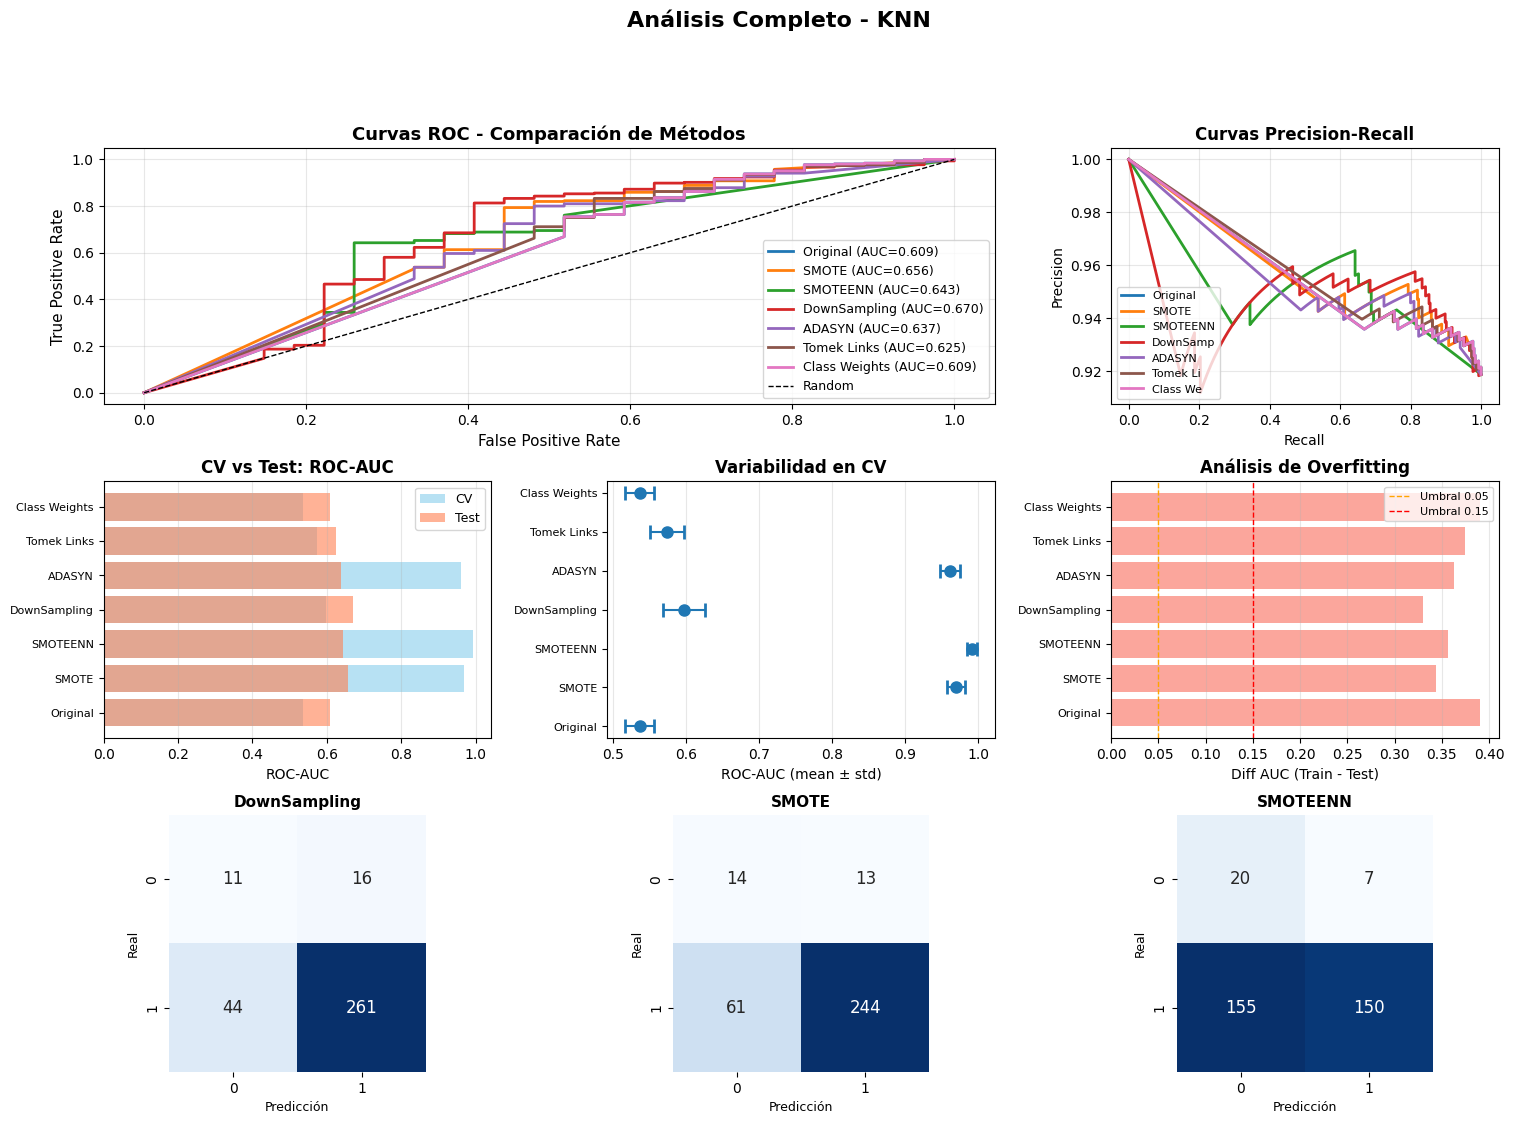

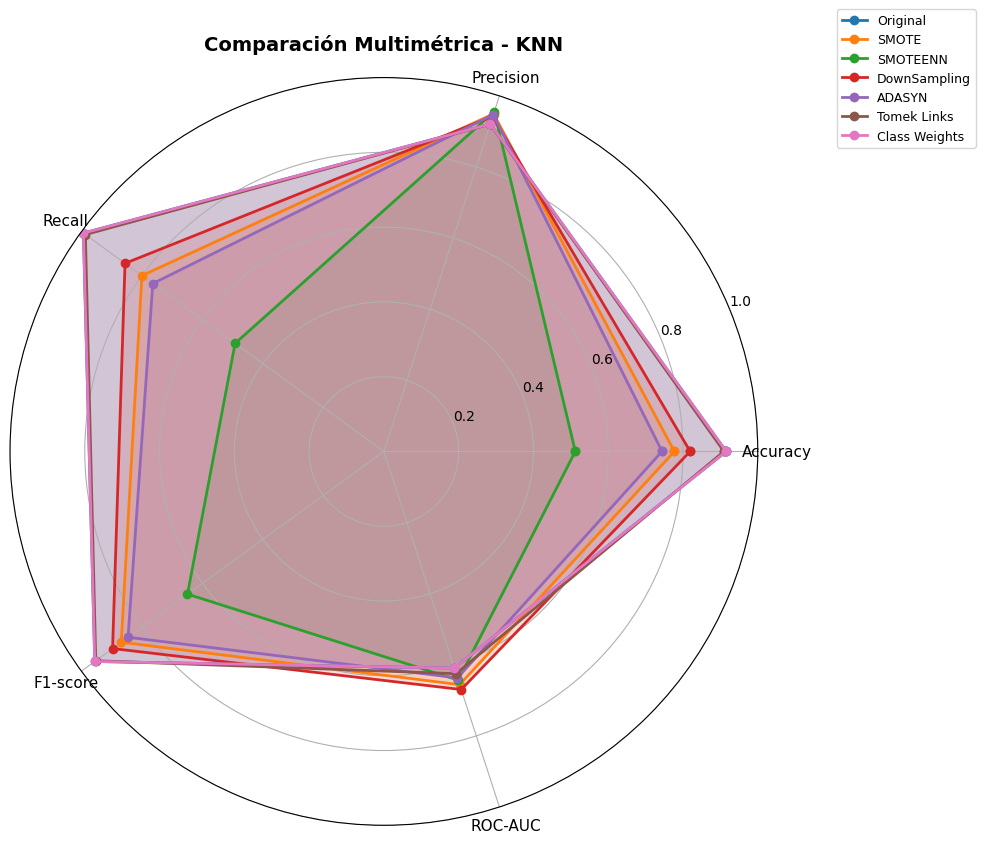


 📈 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.799053  0.144753  0.512048  0.760542  0.819277  0.912651   
Precision    7.0  0.936665  0.015326  0.920489  0.920973  0.942238  0.948285   
Recall       7.0  0.840749  0.181446  0.491803  0.781967  0.855738  0.990164   
F1-score     7.0  0.874932  0.109071  0.649351  0.857031  0.896907  0.954184   
ROC-AUC      7.0  0.635632  0.022801  0.609350  0.617183  0.636976  0.649575   

                max  
Accuracy   0.915663  
Precision  0.955414  
Recall     0.993443  
F1-score   0.955836  
ROC-AUC    0.669581  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.857475  0.099559  0.657548  0.828003  0.913335   
CV Precision    7.0  0.924313  0.100078  0.716237  0.918845  0.919447   
CV Recall       7.0  0.875819  0.116263  0.735840  0.779485  0.856609   
CV F1           7.0  0.89

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve,
                             confusion_matrix, precision_recall_curve, auc, make_scorer)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ===============================
# CONFIGURACIÓN DEL MODELO
# ===============================
# Descomenta el modelo que quieras usar:

# MODELO_TIPO = "LogisticRegression"
# MODELO_TIPO = "DecisionTree"
# MODELO_TIPO = "RandomForest"
MODELO_TIPO = "KNN"
# MODELO_TIPO = "SVM"
# MODELO_TIPO = "GradientBoosting"
# MODELO_TIPO = "XGBoost"

# Configuración de Cross-Validation
N_FOLDS = 5
RANDOM_STATE = 42

print("="*70)
print(f" ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - {MODELO_TIPO.upper()}")
print("="*70)
print(f" Cross-Validation: {N_FOLDS}-Fold Stratified")
print("="*70)

# ===============================
# FUNCIÓN PARA CREAR MODELOS
# ===============================
def crear_modelo(tipo, usar_class_weight=False):
    """Crea el modelo según el tipo especificado"""

    if tipo == "LogisticRegression":
        cw = 'balanced' if usar_class_weight else None
        return LogisticRegression(max_iter=1000, class_weight=cw, random_state=RANDOM_STATE)

    elif tipo == "DecisionTree":
        cw = 'balanced' if usar_class_weight else None
        return DecisionTreeClassifier(
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            min_samples_leaf=5
        )

    elif tipo == "RandomForest":
        cw = 'balanced' if usar_class_weight else None
        return RandomForestClassifier(
            n_estimators=100,
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            n_jobs=-1
        )

    elif tipo == "KNN":
        # KNN no soporta class_weight directamente
        return KNeighborsClassifier(
            n_neighbors=5,
            weights='distance',  # Pondera por distancia
            metric='minkowski',
            n_jobs=-1
        )

    elif tipo == "SVM":
        cw = 'balanced' if usar_class_weight else None
        return SVC(
            class_weight=cw,
            random_state=RANDOM_STATE,
            kernel='rbf',
            probability=True,  # Necesario para predict_proba
            C=1.0,
            gamma='scale'
        )

    elif tipo == "GradientBoosting":
        return GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=RANDOM_STATE,
            subsample=0.8
        )

    elif tipo == "XGBoost":
        # XGBoost usa scale_pos_weight en lugar de class_weight
        if usar_class_weight:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                scale_pos_weight=3,  # Ajusta según tu desbalance
                eval_metric='logloss',
                use_label_encoder=False
            )
        else:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                eval_metric='logloss',
                use_label_encoder=False
            )

# ===============================
# CONFIGURACIÓN DE DATASETS
# ===============================
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# Métricas para cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

resultados_train = []
resultados_test = []
resultados_cv = []
matrices_confusion = {}
curvas_pr = {}
modelos_entrenados = {}

# ===============================
# ENTRENAMIENTO Y EVALUACIÓN
# ===============================
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

for nombre, (X_tr, y_tr) in datasets.items():
    print(f"\n{'='*70}")
    print(f" ENTRENANDO: {nombre}")
    print(f"{'='*70}")

    # Crear modelo
    usar_cw = (nombre == "Class Weights")
    modelo = crear_modelo(MODELO_TIPO, usar_class_weight=usar_cw)

    # ===== CROSS-VALIDATION =====
    print("\n--- CROSS-VALIDATION (Train) ---")
    cv_results = {}

    for metric_name, metric_func in scoring.items():
        scores = cross_val_score(modelo, X_tr, y_tr, cv=skf, scoring=metric_func, n_jobs=-1)
        cv_results[metric_name] = scores
        print(f"{metric_name.upper():12s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    resultados_cv.append({
        "Método": nombre,
        "CV Accuracy": cv_results['accuracy'].mean(),
        "CV Accuracy Std": cv_results['accuracy'].std(),
        "CV Precision": cv_results['precision'].mean(),
        "CV Recall": cv_results['recall'].mean(),
        "CV F1": cv_results['f1'].mean(),
        "CV ROC-AUC": cv_results['roc_auc'].mean(),
        "CV ROC-AUC Std": cv_results['roc_auc'].std()
    })

    # Entrenar modelo final
    modelo.fit(X_tr, y_tr)
    modelos_entrenados[nombre] = modelo

    # ===== MÉTRICAS TRAIN =====
    y_pred_train = modelo.predict(X_tr)
    y_prob_train = modelo.predict_proba(X_tr)[:, 1]

    print("\n--- MÉTRICAS TRAIN (Full) ---")
    print(classification_report(y_tr, y_pred_train))

    resultados_train.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_tr, y_pred_train),
        "Precision": precision_score(y_tr, y_pred_train),
        "Recall": recall_score(y_tr, y_pred_train),
        "F1-score": f1_score(y_tr, y_pred_train),
        "ROC-AUC": roc_auc_score(y_tr, y_prob_train),
        "Tamaño": len(y_tr)
    })

    # ===== MÉTRICAS TEST =====
    y_pred_test = modelo.predict(X_test)
    y_prob_test = modelo.predict_proba(X_test)[:, 1]

    print("\n--- MÉTRICAS TEST ---")
    print(classification_report(y_test, y_pred_test))

    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0

    resultados_test.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-score": f1_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_prob_test),
        "Especificidad": especificidad
    })

    # Guardar matriz de confusión
    matrices_confusion[nombre] = cm

    # Guardar curva Precision-Recall
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob_test)
    curvas_pr[nombre] = (precision_vals, recall_vals, auc(recall_vals, precision_vals))

# ===============================
# DATAFRAMES DE RESULTADOS
# ===============================
df_train = pd.DataFrame(resultados_train)
df_test = pd.DataFrame(resultados_test)
df_cv = pd.DataFrame(resultados_cv)

print("\n" + "="*70)
print(" 📊 RESULTADOS CROSS-VALIDATION")
print("="*70)
print(df_cv.sort_values(by="CV ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TRAIN (Full)")
print("="*70)
print(df_train.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TEST")
print("="*70)
print(df_test.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

# ===============================
# ANÁLISIS DE OVERFITTING
# ===============================
print("\n" + "="*70)
print(" 🔍 ANÁLISIS DE OVERFITTING")
print("="*70)

overfitting_analysis = []
for i, row_train in df_train.iterrows():
    metodo = row_train['Método']
    row_test = df_test[df_test['Método'] == metodo].iloc[0]
    row_cv = df_cv[df_cv['Método'] == metodo].iloc[0]

    overfitting_analysis.append({
        'Método': metodo,
        'Train-Test (Acc)': row_train['Accuracy'] - row_test['Accuracy'],
        'Train-Test (AUC)': row_train['ROC-AUC'] - row_test['ROC-AUC'],
        'CV-Test (AUC)': row_cv['CV ROC-AUC'] - row_test['ROC-AUC'],
        'CV Std AUC': row_cv['CV ROC-AUC Std']
    })

df_overfit = pd.DataFrame(overfitting_analysis)
print(df_overfit.sort_values(by='Train-Test (AUC)').to_string(index=False))

# ===============================
# VISUALIZACIONES
# ===============================

# 1. PANEL PRINCIPAL
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Subplot 1: Curvas ROC
ax1 = fig.add_subplot(gs[0, :2])
for nombre, modelo in modelos_entrenados.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    ax1.plot(fpr, tpr, label=f'{nombre} (AUC={roc_auc:.3f})', linewidth=2)

ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=11)
ax1.set_ylabel('True Positive Rate', fontsize=11)
ax1.set_title('Curvas ROC - Comparación de Métodos', fontsize=13, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Subplot 2: Curvas Precision-Recall
ax2 = fig.add_subplot(gs[0, 2])
for nombre, (precision_vals, recall_vals, pr_auc) in curvas_pr.items():
    ax2.plot(recall_vals, precision_vals, label=f'{nombre[:8]}', linewidth=2)

ax2.set_xlabel('Recall', fontsize=10)
ax2.set_ylabel('Precision', fontsize=10)
ax2.set_title('Curvas Precision-Recall', fontsize=12, fontweight='bold')
ax2.legend(loc='lower left', fontsize=8)
ax2.grid(True, alpha=0.3)

# Subplot 3: Comparación CV vs Test
ax3 = fig.add_subplot(gs[1, 0])
metodos = df_cv['Método']
x_pos = np.arange(len(metodos))

ax3.barh(x_pos, df_cv['CV ROC-AUC'], alpha=0.6, label='CV', color='skyblue')
ax3.barh(x_pos, df_test['ROC-AUC'], alpha=0.6, label='Test', color='coral')
ax3.set_yticks(x_pos)
ax3.set_yticklabels(metodos, fontsize=8)
ax3.set_xlabel('ROC-AUC', fontsize=10)
ax3.set_title('CV vs Test: ROC-AUC', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Subplot 4: Variabilidad CV
ax4 = fig.add_subplot(gs[1, 1])
ax4.errorbar(df_cv['CV ROC-AUC'], x_pos, xerr=df_cv['CV ROC-AUC Std'],
             fmt='o', capsize=5, capthick=2, markersize=8)
ax4.set_yticks(x_pos)
ax4.set_yticklabels(metodos, fontsize=8)
ax4.set_xlabel('ROC-AUC (mean ± std)', fontsize=10)
ax4.set_title('Variabilidad en CV', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# Subplot 5: Overfitting
ax5 = fig.add_subplot(gs[1, 2])
ax5.barh(x_pos, df_overfit['Train-Test (AUC)'], alpha=0.7, color='salmon')
ax5.set_yticks(x_pos)
ax5.set_yticklabels(metodos, fontsize=8)
ax5.set_xlabel('Diff AUC (Train - Test)', fontsize=10)
ax5.set_title('Análisis de Overfitting', fontsize=12, fontweight='bold')
ax5.axvline(x=0.05, color='orange', linestyle='--', linewidth=1, label='Umbral 0.05')
ax5.axvline(x=0.15, color='red', linestyle='--', linewidth=1, label='Umbral 0.15')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3, axis='x')

# Subplot 6-8: Mejores 3 matrices de confusión
top3_metodos = df_test.nlargest(3, 'ROC-AUC')['Método'].tolist()
for idx, metodo in enumerate(top3_metodos):
    ax = fig.add_subplot(gs[2, idx])
    cm = matrices_confusion[metodo]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, square=True, annot_kws={'size': 12})
    ax.set_title(f'{metodo}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicción', fontsize=9)
    ax.set_ylabel('Real', fontsize=9)

plt.suptitle(f'Análisis Completo - {MODELO_TIPO}', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# 2. GRÁFICO RADAR COMPARATIVO
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categorias = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
N = len(categorias)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for metodo in df_test['Método']:
    valores = df_test[df_test['Método'] == metodo][categorias].values[0].tolist()
    valores += valores[:1]
    ax.plot(angles, valores, 'o-', linewidth=2, label=metodo)
    ax.fill(angles, valores, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, size=11)
ax.set_ylim(0, 1)
ax.set_title(f'Comparación Multimétrica - {MODELO_TIPO}', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# ESTADÍSTICAS DESCRIPTIVAS
# ===============================
print("\n" + "="*70)
print(" 📈 ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
print("\n--- TEST ---")
print(df_test[['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']].describe().T)
print("\n--- CROSS-VALIDATION ---")
print(df_cv[['CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1', 'CV ROC-AUC']].describe().T)

# ===============================
# RECOMENDACIONES
# ===============================
print("\n" + "="*70)
print(" 💡 RECOMENDACIONES FINALES")
print("="*70)

mejor_cv = df_cv.loc[df_cv['CV ROC-AUC'].idxmax()]
mejor_test = df_test.loc[df_test['ROC-AUC'].idxmax()]
mejor_recall = df_test.loc[df_test['Recall'].idxmax()]
mejor_precision = df_test.loc[df_test['Precision'].idxmax()]
mejor_f1 = df_test.loc[df_test['F1-score'].idxmax()]
menos_overfit = df_overfit.loc[df_overfit['Train-Test (AUC)'].idxmin()]
mas_estable = df_cv.loc[df_cv['CV ROC-AUC Std'].idxmin()]

print(f"\n🏆 MEJOR RENDIMIENTO:")
print(f"  • CV ROC-AUC: {mejor_cv['Método']} ({mejor_cv['CV ROC-AUC']:.4f} ± {mejor_cv['CV ROC-AUC Std']:.4f})")
print(f"  • Test ROC-AUC: {mejor_test['Método']} ({mejor_test['ROC-AUC']:.4f})")
print(f"  • Recall: {mejor_recall['Método']} ({mejor_recall['Recall']:.4f})")
print(f"  • Precision: {mejor_precision['Método']} ({mejor_precision['Precision']:.4f})")
print(f"  • F1-Score: {mejor_f1['Método']} ({mejor_f1['F1-score']:.4f})")

print(f"\n🎯 GENERALIZACIÓN:")
print(f"  • Menor Overfitting: {menos_overfit['Método']} (diff={menos_overfit['Train-Test (AUC)']:.4f})")
print(f"  • Mayor Estabilidad CV: {mas_estable['Método']} (std={mas_estable['CV ROC-AUC Std']:.4f})")

print("\n" + "="*70)

### SVM

 ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - SVM
 Cross-Validation: 5-Fold Stratified

 ENTRENANDO: Original

--- CROSS-VALIDATION (Train) ---
ACCURACY    : 0.9186 (+/- 0.0018)
PRECISION   : 0.9186 (+/- 0.0018)
RECALL      : 1.0000 (+/- 0.0000)
F1          : 0.9576 (+/- 0.0010)
ROC_AUC     : 0.7316 (+/- 0.0641)

--- MÉTRICAS TRAIN (Full) ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.92      1.00      0.96      1219

    accuracy                           0.92      1327
   macro avg       0.46      0.50      0.48      1327
weighted avg       0.84      0.92      0.88      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.92      1.00      0.96       305

    accuracy                           0.92       332
   macro avg       0.46      0.50      0.48       332
weighted avg       0.84      0.92 

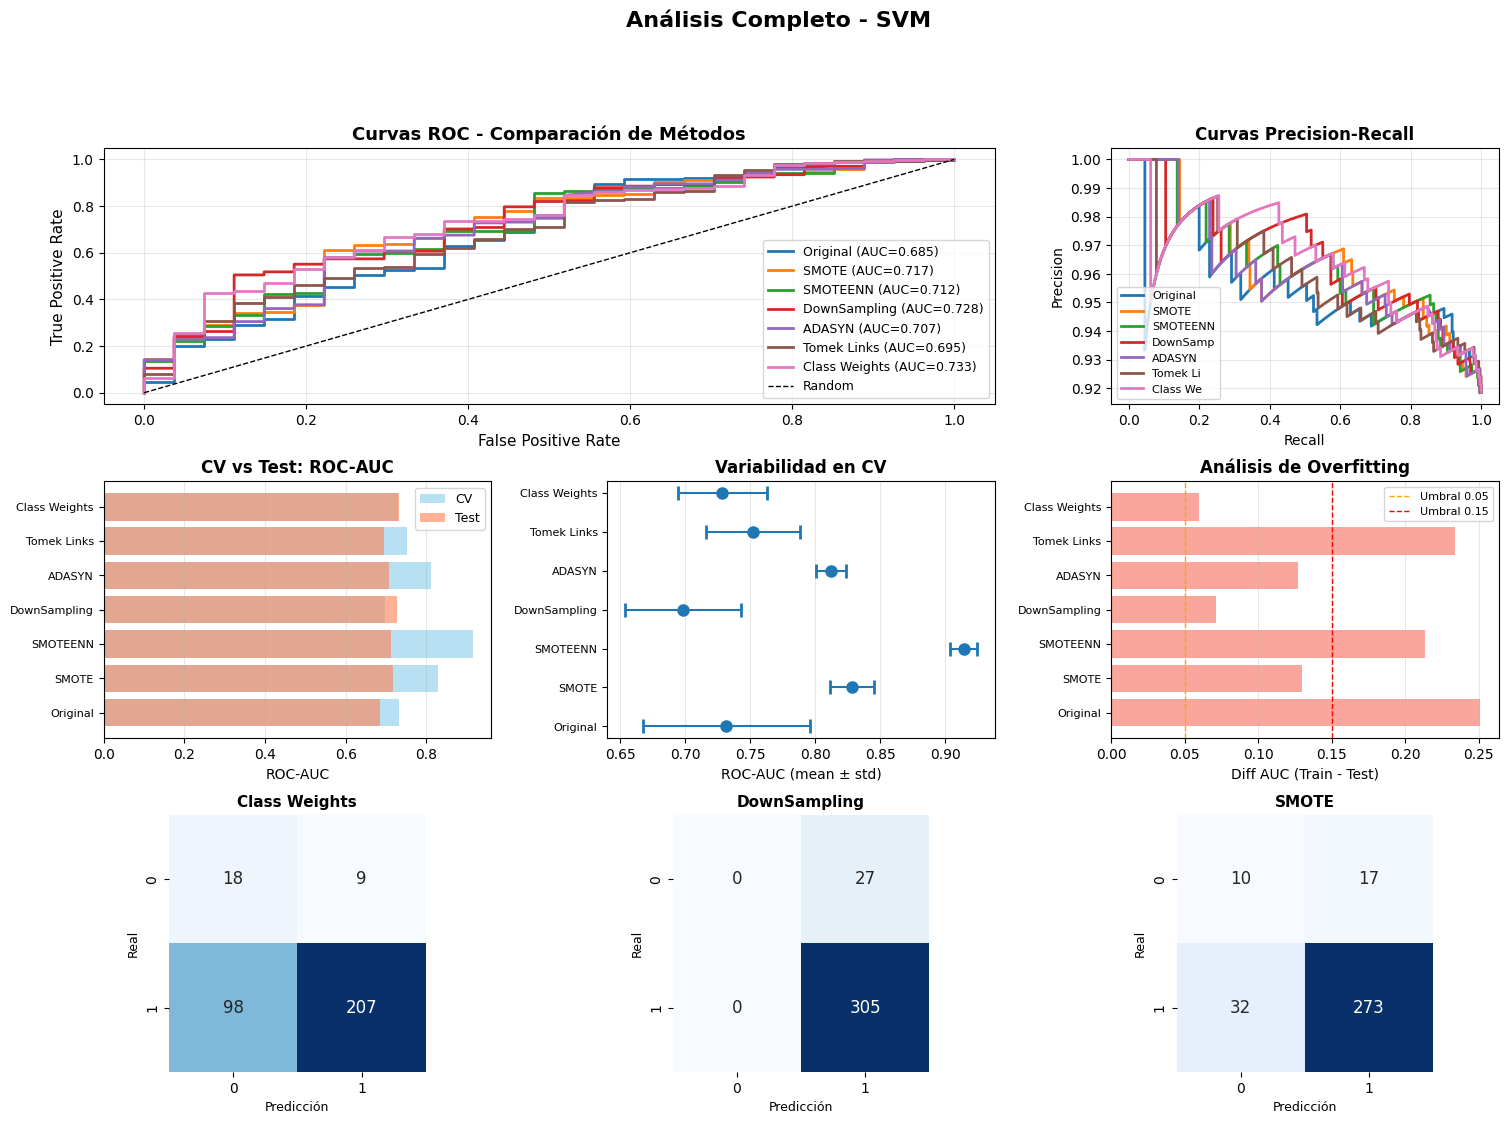

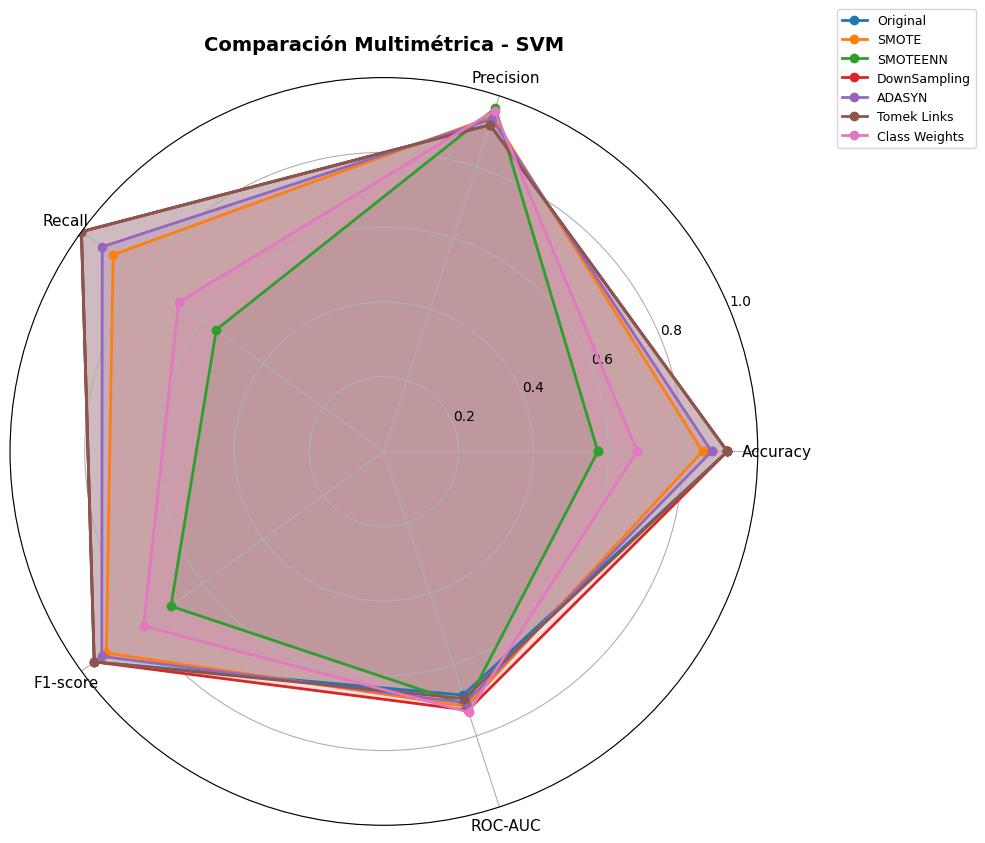


 📈 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.819277  0.138478  0.572289  0.765060  0.876506  0.918675   
Precision    7.0  0.936523  0.019632  0.918675  0.918675  0.934211  0.949856   
Recall       7.0  0.865574  0.178571  0.554098  0.786885  0.931148  1.000000   
F1-score     7.0  0.888851  0.099935  0.704167  0.856136  0.932677  0.957614   
ROC-AUC      7.0  0.711137  0.016985  0.685367  0.701154  0.712204  0.722556   

                max  
Accuracy   0.918675  
Precision  0.965714  
Recall     1.000000  
F1-score   0.957614  
ROC-AUC    0.732969  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.783796  0.112104  0.656363  0.696097  0.748360   
CV Precision    7.0  0.831768  0.112154  0.666683  0.743990  0.875677   
CV Recall       7.0  0.886531  0.149260  0.655441  0.801801  0.946671   
CV F1           7.0  0.84

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve,
                             confusion_matrix, precision_recall_curve, auc, make_scorer)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ===============================
# CONFIGURACIÓN DEL MODELO
# ===============================
# Descomenta el modelo que quieras usar:

# MODELO_TIPO = "LogisticRegression"
# MODELO_TIPO = "DecisionTree"
# MODELO_TIPO = "RandomForest"
# MODELO_TIPO = "KNN"
MODELO_TIPO = "SVM"
# MODELO_TIPO = "GradientBoosting"
# MODELO_TIPO = "XGBoost"

# Configuración de Cross-Validation
N_FOLDS = 5
RANDOM_STATE = 42

print("="*70)
print(f" ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - {MODELO_TIPO.upper()}")
print("="*70)
print(f" Cross-Validation: {N_FOLDS}-Fold Stratified")
print("="*70)

# ===============================
# FUNCIÓN PARA CREAR MODELOS
# ===============================
def crear_modelo(tipo, usar_class_weight=False):
    """Crea el modelo según el tipo especificado"""

    if tipo == "LogisticRegression":
        cw = 'balanced' if usar_class_weight else None
        return LogisticRegression(max_iter=1000, class_weight=cw, random_state=RANDOM_STATE)

    elif tipo == "DecisionTree":
        cw = 'balanced' if usar_class_weight else None
        return DecisionTreeClassifier(
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            min_samples_leaf=5
        )

    elif tipo == "RandomForest":
        cw = 'balanced' if usar_class_weight else None
        return RandomForestClassifier(
            n_estimators=100,
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            n_jobs=-1
        )

    elif tipo == "KNN":
        # KNN no soporta class_weight directamente
        return KNeighborsClassifier(
            n_neighbors=5,
            weights='distance',  # Pondera por distancia
            metric='minkowski',
            n_jobs=-1
        )

    elif tipo == "SVM":
        cw = 'balanced' if usar_class_weight else None
        return SVC(
            class_weight=cw,
            random_state=RANDOM_STATE,
            kernel='rbf',
            probability=True,  # Necesario para predict_proba
            C=1.0,
            gamma='scale'
        )

    elif tipo == "GradientBoosting":
        return GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=RANDOM_STATE,
            subsample=0.8
        )

    elif tipo == "XGBoost":
        # XGBoost usa scale_pos_weight en lugar de class_weight
        if usar_class_weight:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                scale_pos_weight=3,  # Ajusta según tu desbalance
                eval_metric='logloss',
                use_label_encoder=False
            )
        else:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                eval_metric='logloss',
                use_label_encoder=False
            )

# ===============================
# CONFIGURACIÓN DE DATASETS
# ===============================
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# Métricas para cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

resultados_train = []
resultados_test = []
resultados_cv = []
matrices_confusion = {}
curvas_pr = {}
modelos_entrenados = {}

# ===============================
# ENTRENAMIENTO Y EVALUACIÓN
# ===============================
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

for nombre, (X_tr, y_tr) in datasets.items():
    print(f"\n{'='*70}")
    print(f" ENTRENANDO: {nombre}")
    print(f"{'='*70}")

    # Crear modelo
    usar_cw = (nombre == "Class Weights")
    modelo = crear_modelo(MODELO_TIPO, usar_class_weight=usar_cw)

    # ===== CROSS-VALIDATION =====
    print("\n--- CROSS-VALIDATION (Train) ---")
    cv_results = {}

    for metric_name, metric_func in scoring.items():
        scores = cross_val_score(modelo, X_tr, y_tr, cv=skf, scoring=metric_func, n_jobs=-1)
        cv_results[metric_name] = scores
        print(f"{metric_name.upper():12s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    resultados_cv.append({
        "Método": nombre,
        "CV Accuracy": cv_results['accuracy'].mean(),
        "CV Accuracy Std": cv_results['accuracy'].std(),
        "CV Precision": cv_results['precision'].mean(),
        "CV Recall": cv_results['recall'].mean(),
        "CV F1": cv_results['f1'].mean(),
        "CV ROC-AUC": cv_results['roc_auc'].mean(),
        "CV ROC-AUC Std": cv_results['roc_auc'].std()
    })

    # Entrenar modelo final
    modelo.fit(X_tr, y_tr)
    modelos_entrenados[nombre] = modelo

    # ===== MÉTRICAS TRAIN =====
    y_pred_train = modelo.predict(X_tr)
    y_prob_train = modelo.predict_proba(X_tr)[:, 1]

    print("\n--- MÉTRICAS TRAIN (Full) ---")
    print(classification_report(y_tr, y_pred_train))

    resultados_train.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_tr, y_pred_train),
        "Precision": precision_score(y_tr, y_pred_train),
        "Recall": recall_score(y_tr, y_pred_train),
        "F1-score": f1_score(y_tr, y_pred_train),
        "ROC-AUC": roc_auc_score(y_tr, y_prob_train),
        "Tamaño": len(y_tr)
    })

    # ===== MÉTRICAS TEST =====
    y_pred_test = modelo.predict(X_test)
    y_prob_test = modelo.predict_proba(X_test)[:, 1]

    print("\n--- MÉTRICAS TEST ---")
    print(classification_report(y_test, y_pred_test))

    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0

    resultados_test.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-score": f1_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_prob_test),
        "Especificidad": especificidad
    })

    # Guardar matriz de confusión
    matrices_confusion[nombre] = cm

    # Guardar curva Precision-Recall
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob_test)
    curvas_pr[nombre] = (precision_vals, recall_vals, auc(recall_vals, precision_vals))

# ===============================
# DATAFRAMES DE RESULTADOS
# ===============================
df_train = pd.DataFrame(resultados_train)
df_test = pd.DataFrame(resultados_test)
df_cv = pd.DataFrame(resultados_cv)

print("\n" + "="*70)
print(" 📊 RESULTADOS CROSS-VALIDATION")
print("="*70)
print(df_cv.sort_values(by="CV ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TRAIN (Full)")
print("="*70)
print(df_train.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TEST")
print("="*70)
print(df_test.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

# ===============================
# ANÁLISIS DE OVERFITTING
# ===============================
print("\n" + "="*70)
print(" 🔍 ANÁLISIS DE OVERFITTING")
print("="*70)

overfitting_analysis = []
for i, row_train in df_train.iterrows():
    metodo = row_train['Método']
    row_test = df_test[df_test['Método'] == metodo].iloc[0]
    row_cv = df_cv[df_cv['Método'] == metodo].iloc[0]

    overfitting_analysis.append({
        'Método': metodo,
        'Train-Test (Acc)': row_train['Accuracy'] - row_test['Accuracy'],
        'Train-Test (AUC)': row_train['ROC-AUC'] - row_test['ROC-AUC'],
        'CV-Test (AUC)': row_cv['CV ROC-AUC'] - row_test['ROC-AUC'],
        'CV Std AUC': row_cv['CV ROC-AUC Std']
    })

df_overfit = pd.DataFrame(overfitting_analysis)
print(df_overfit.sort_values(by='Train-Test (AUC)').to_string(index=False))

# ===============================
# VISUALIZACIONES
# ===============================

# 1. PANEL PRINCIPAL
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Subplot 1: Curvas ROC
ax1 = fig.add_subplot(gs[0, :2])
for nombre, modelo in modelos_entrenados.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    ax1.plot(fpr, tpr, label=f'{nombre} (AUC={roc_auc:.3f})', linewidth=2)

ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=11)
ax1.set_ylabel('True Positive Rate', fontsize=11)
ax1.set_title('Curvas ROC - Comparación de Métodos', fontsize=13, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Subplot 2: Curvas Precision-Recall
ax2 = fig.add_subplot(gs[0, 2])
for nombre, (precision_vals, recall_vals, pr_auc) in curvas_pr.items():
    ax2.plot(recall_vals, precision_vals, label=f'{nombre[:8]}', linewidth=2)

ax2.set_xlabel('Recall', fontsize=10)
ax2.set_ylabel('Precision', fontsize=10)
ax2.set_title('Curvas Precision-Recall', fontsize=12, fontweight='bold')
ax2.legend(loc='lower left', fontsize=8)
ax2.grid(True, alpha=0.3)

# Subplot 3: Comparación CV vs Test
ax3 = fig.add_subplot(gs[1, 0])
metodos = df_cv['Método']
x_pos = np.arange(len(metodos))

ax3.barh(x_pos, df_cv['CV ROC-AUC'], alpha=0.6, label='CV', color='skyblue')
ax3.barh(x_pos, df_test['ROC-AUC'], alpha=0.6, label='Test', color='coral')
ax3.set_yticks(x_pos)
ax3.set_yticklabels(metodos, fontsize=8)
ax3.set_xlabel('ROC-AUC', fontsize=10)
ax3.set_title('CV vs Test: ROC-AUC', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Subplot 4: Variabilidad CV
ax4 = fig.add_subplot(gs[1, 1])
ax4.errorbar(df_cv['CV ROC-AUC'], x_pos, xerr=df_cv['CV ROC-AUC Std'],
             fmt='o', capsize=5, capthick=2, markersize=8)
ax4.set_yticks(x_pos)
ax4.set_yticklabels(metodos, fontsize=8)
ax4.set_xlabel('ROC-AUC (mean ± std)', fontsize=10)
ax4.set_title('Variabilidad en CV', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# Subplot 5: Overfitting
ax5 = fig.add_subplot(gs[1, 2])
ax5.barh(x_pos, df_overfit['Train-Test (AUC)'], alpha=0.7, color='salmon')
ax5.set_yticks(x_pos)
ax5.set_yticklabels(metodos, fontsize=8)
ax5.set_xlabel('Diff AUC (Train - Test)', fontsize=10)
ax5.set_title('Análisis de Overfitting', fontsize=12, fontweight='bold')
ax5.axvline(x=0.05, color='orange', linestyle='--', linewidth=1, label='Umbral 0.05')
ax5.axvline(x=0.15, color='red', linestyle='--', linewidth=1, label='Umbral 0.15')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3, axis='x')

# Subplot 6-8: Mejores 3 matrices de confusión
top3_metodos = df_test.nlargest(3, 'ROC-AUC')['Método'].tolist()
for idx, metodo in enumerate(top3_metodos):
    ax = fig.add_subplot(gs[2, idx])
    cm = matrices_confusion[metodo]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, square=True, annot_kws={'size': 12})
    ax.set_title(f'{metodo}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicción', fontsize=9)
    ax.set_ylabel('Real', fontsize=9)

plt.suptitle(f'Análisis Completo - {MODELO_TIPO}', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# 2. GRÁFICO RADAR COMPARATIVO
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categorias = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
N = len(categorias)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for metodo in df_test['Método']:
    valores = df_test[df_test['Método'] == metodo][categorias].values[0].tolist()
    valores += valores[:1]
    ax.plot(angles, valores, 'o-', linewidth=2, label=metodo)
    ax.fill(angles, valores, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, size=11)
ax.set_ylim(0, 1)
ax.set_title(f'Comparación Multimétrica - {MODELO_TIPO}', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# ESTADÍSTICAS DESCRIPTIVAS
# ===============================
print("\n" + "="*70)
print(" 📈 ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
print("\n--- TEST ---")
print(df_test[['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']].describe().T)
print("\n--- CROSS-VALIDATION ---")
print(df_cv[['CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1', 'CV ROC-AUC']].describe().T)

# ===============================
# RECOMENDACIONES
# ===============================
print("\n" + "="*70)
print(" 💡 RECOMENDACIONES FINALES")
print("="*70)

mejor_cv = df_cv.loc[df_cv['CV ROC-AUC'].idxmax()]
mejor_test = df_test.loc[df_test['ROC-AUC'].idxmax()]
mejor_recall = df_test.loc[df_test['Recall'].idxmax()]
mejor_precision = df_test.loc[df_test['Precision'].idxmax()]
mejor_f1 = df_test.loc[df_test['F1-score'].idxmax()]
menos_overfit = df_overfit.loc[df_overfit['Train-Test (AUC)'].idxmin()]
mas_estable = df_cv.loc[df_cv['CV ROC-AUC Std'].idxmin()]

print(f"\n🏆 MEJOR RENDIMIENTO:")
print(f"  • CV ROC-AUC: {mejor_cv['Método']} ({mejor_cv['CV ROC-AUC']:.4f} ± {mejor_cv['CV ROC-AUC Std']:.4f})")
print(f"  • Test ROC-AUC: {mejor_test['Método']} ({mejor_test['ROC-AUC']:.4f})")
print(f"  • Recall: {mejor_recall['Método']} ({mejor_recall['Recall']:.4f})")
print(f"  • Precision: {mejor_precision['Método']} ({mejor_precision['Precision']:.4f})")
print(f"  • F1-Score: {mejor_f1['Método']} ({mejor_f1['F1-score']:.4f})")

print(f"\n🎯 GENERALIZACIÓN:")
print(f"  • Menor Overfitting: {menos_overfit['Método']} (diff={menos_overfit['Train-Test (AUC)']:.4f})")
print(f"  • Mayor Estabilidad CV: {mas_estable['Método']} (std={mas_estable['CV ROC-AUC Std']:.4f})")

print("\n" + "="*70)

### Gradient Boosting

 ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - GRADIENTBOOSTING
 Cross-Validation: 5-Fold Stratified

 ENTRENANDO: Original

--- CROSS-VALIDATION (Train) ---
ACCURACY    : 0.9307 (+/- 0.0070)
PRECISION   : 0.9379 (+/- 0.0050)
RECALL      : 0.9901 (+/- 0.0076)
F1          : 0.9633 (+/- 0.0038)
ROC_AUC     : 0.8121 (+/- 0.0270)

--- MÉTRICAS TRAIN (Full) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00      1219

    accuracy                           1.00      1327
   macro avg       1.00      1.00      1.00      1327
weighted avg       1.00      1.00      1.00      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.70      0.26      0.38        27
           1       0.94      0.99      0.96       305

    accuracy                           0.93       332
   macro avg       0.82      0.62      0.67       332
weighted avg       0.

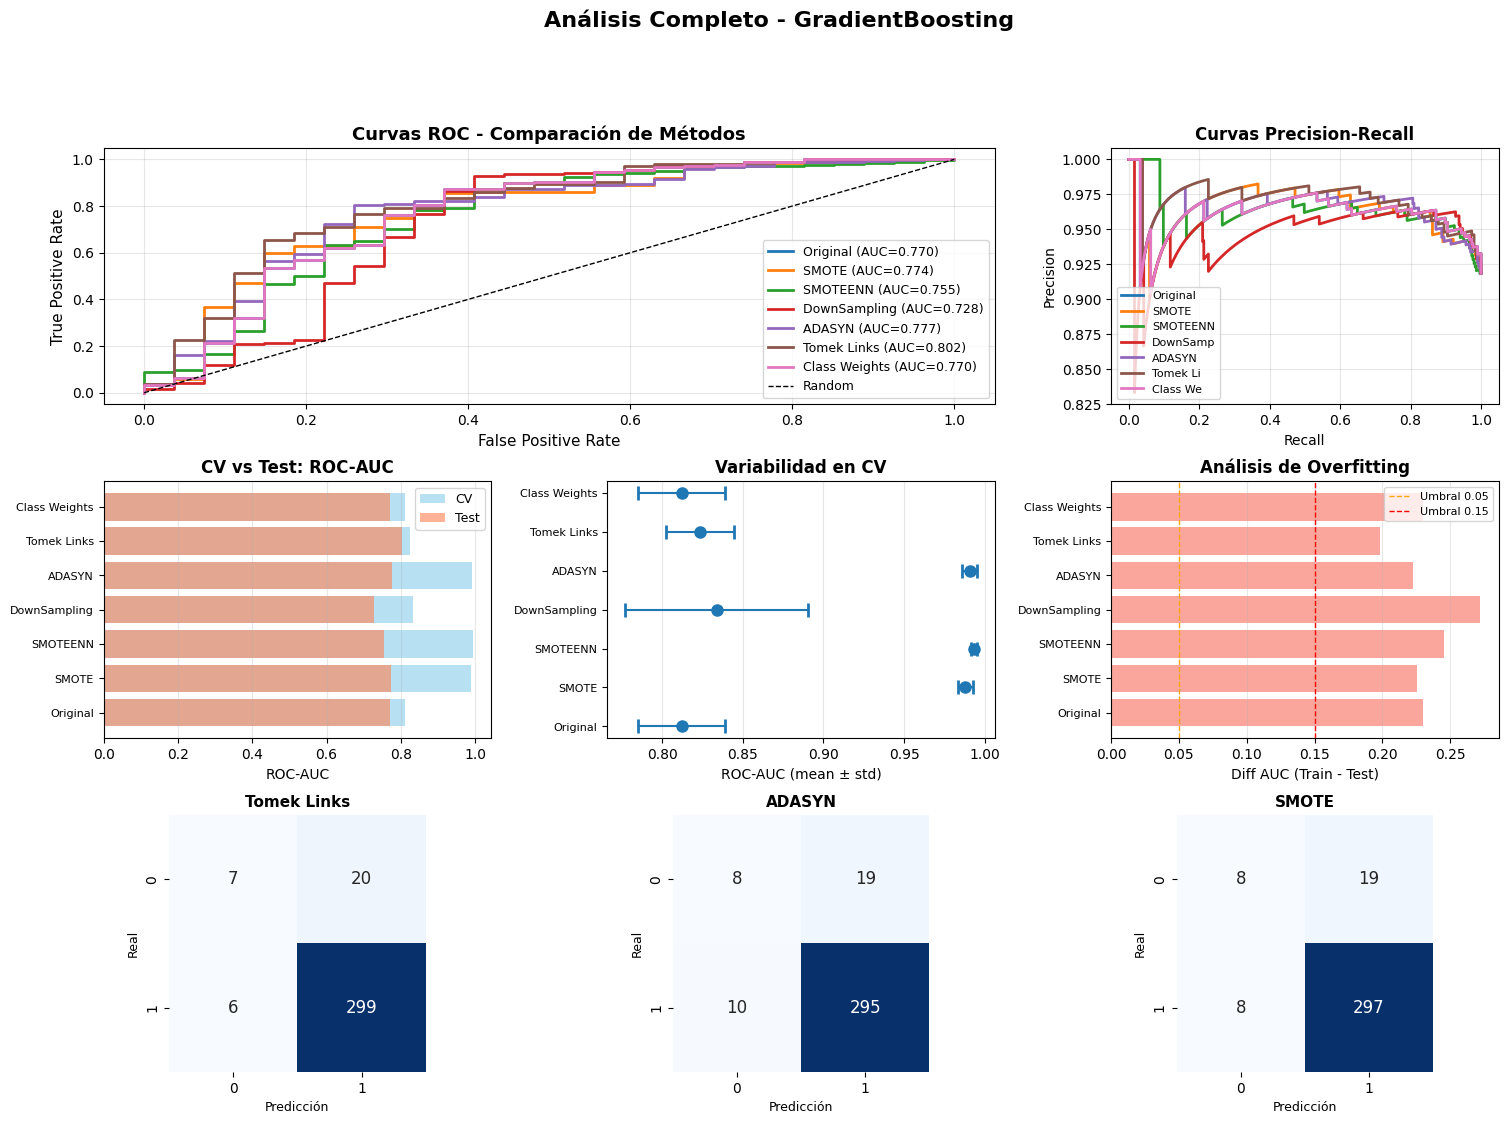

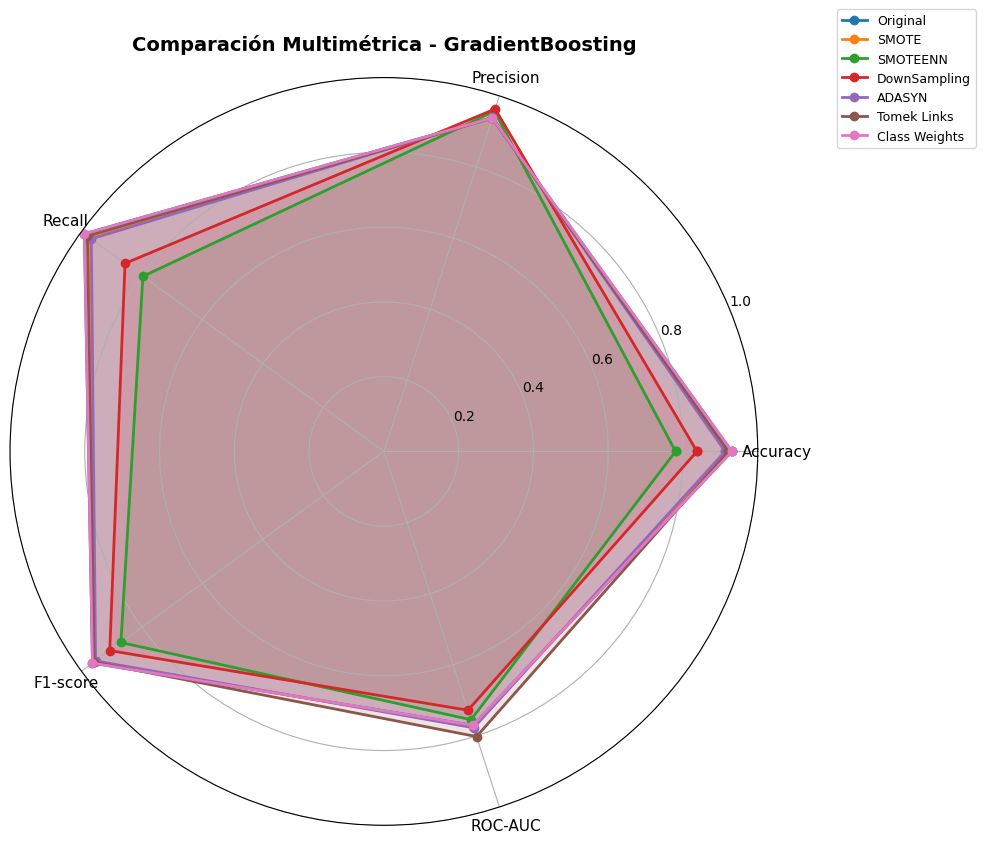


 📈 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.890275  0.058454  0.780120  0.875000  0.918675  0.926205   
Precision    7.0  0.944605  0.010648  0.937304  0.937888  0.939490  0.948283   
Recall       7.0  0.936300  0.077538  0.796721  0.911475  0.973770  0.985246   
F1-score     7.0  0.938614  0.036465  0.869410  0.929700  0.956522  0.960825   
ROC-AUC      7.0  0.768063  0.022648  0.727869  0.762417  0.770249  0.775774   

                max  
Accuracy   0.930723  
Precision  0.963100  
Recall     0.990164  
F1-score   0.963317  
ROC-AUC    0.801943  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.927444  0.045407  0.830192  0.928243  0.930668   
CV Precision    7.0  0.935758  0.046067  0.837823  0.936625  0.937874   
CV Recall       7.0  0.963744  0.038346  0.893357  0.951622  0.981957   
CV F1           7.0  0.94

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve,
                             confusion_matrix, precision_recall_curve, auc, make_scorer)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ===============================
# CONFIGURACIÓN DEL MODELO
# ===============================
# Descomenta el modelo que quieras usar:

# MODELO_TIPO = "LogisticRegression"
# MODELO_TIPO = "DecisionTree"
# MODELO_TIPO = "RandomForest"
# MODELO_TIPO = "KNN"
# MODELO_TIPO = "SVM"
MODELO_TIPO = "GradientBoosting"
# MODELO_TIPO = "XGBoost"

# Configuración de Cross-Validation
N_FOLDS = 5
RANDOM_STATE = 42

print("="*70)
print(f" ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - {MODELO_TIPO.upper()}")
print("="*70)
print(f" Cross-Validation: {N_FOLDS}-Fold Stratified")
print("="*70)

# ===============================
# FUNCIÓN PARA CREAR MODELOS
# ===============================
def crear_modelo(tipo, usar_class_weight=False):
    """Crea el modelo según el tipo especificado"""

    if tipo == "LogisticRegression":
        cw = 'balanced' if usar_class_weight else None
        return LogisticRegression(max_iter=1000, class_weight=cw, random_state=RANDOM_STATE)

    elif tipo == "DecisionTree":
        cw = 'balanced' if usar_class_weight else None
        return DecisionTreeClassifier(
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            min_samples_leaf=5
        )

    elif tipo == "RandomForest":
        cw = 'balanced' if usar_class_weight else None
        return RandomForestClassifier(
            n_estimators=100,
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            n_jobs=-1
        )

    elif tipo == "KNN":
        # KNN no soporta class_weight directamente
        return KNeighborsClassifier(
            n_neighbors=5,
            weights='distance',  # Pondera por distancia
            metric='minkowski',
            n_jobs=-1
        )

    elif tipo == "SVM":
        cw = 'balanced' if usar_class_weight else None
        return SVC(
            class_weight=cw,
            random_state=RANDOM_STATE,
            kernel='rbf',
            probability=True,  # Necesario para predict_proba
            C=1.0,
            gamma='scale'
        )

    elif tipo == "GradientBoosting":
        return GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=RANDOM_STATE,
            subsample=0.8
        )

    elif tipo == "XGBoost":
        # XGBoost usa scale_pos_weight en lugar de class_weight
        if usar_class_weight:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                scale_pos_weight=3,  # Ajusta según tu desbalance
                eval_metric='logloss',
                use_label_encoder=False
            )
        else:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                eval_metric='logloss',
                use_label_encoder=False
            )

# ===============================
# CONFIGURACIÓN DE DATASETS
# ===============================
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# Métricas para cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

resultados_train = []
resultados_test = []
resultados_cv = []
matrices_confusion = {}
curvas_pr = {}
modelos_entrenados = {}

# ===============================
# ENTRENAMIENTO Y EVALUACIÓN
# ===============================
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

for nombre, (X_tr, y_tr) in datasets.items():
    print(f"\n{'='*70}")
    print(f" ENTRENANDO: {nombre}")
    print(f"{'='*70}")

    # Crear modelo
    usar_cw = (nombre == "Class Weights")
    modelo = crear_modelo(MODELO_TIPO, usar_class_weight=usar_cw)

    # ===== CROSS-VALIDATION =====
    print("\n--- CROSS-VALIDATION (Train) ---")
    cv_results = {}

    for metric_name, metric_func in scoring.items():
        scores = cross_val_score(modelo, X_tr, y_tr, cv=skf, scoring=metric_func, n_jobs=-1)
        cv_results[metric_name] = scores
        print(f"{metric_name.upper():12s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    resultados_cv.append({
        "Método": nombre,
        "CV Accuracy": cv_results['accuracy'].mean(),
        "CV Accuracy Std": cv_results['accuracy'].std(),
        "CV Precision": cv_results['precision'].mean(),
        "CV Recall": cv_results['recall'].mean(),
        "CV F1": cv_results['f1'].mean(),
        "CV ROC-AUC": cv_results['roc_auc'].mean(),
        "CV ROC-AUC Std": cv_results['roc_auc'].std()
    })

    # Entrenar modelo final
    modelo.fit(X_tr, y_tr)
    modelos_entrenados[nombre] = modelo

    # ===== MÉTRICAS TRAIN =====
    y_pred_train = modelo.predict(X_tr)
    y_prob_train = modelo.predict_proba(X_tr)[:, 1]

    print("\n--- MÉTRICAS TRAIN (Full) ---")
    print(classification_report(y_tr, y_pred_train))

    resultados_train.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_tr, y_pred_train),
        "Precision": precision_score(y_tr, y_pred_train),
        "Recall": recall_score(y_tr, y_pred_train),
        "F1-score": f1_score(y_tr, y_pred_train),
        "ROC-AUC": roc_auc_score(y_tr, y_prob_train),
        "Tamaño": len(y_tr)
    })

    # ===== MÉTRICAS TEST =====
    y_pred_test = modelo.predict(X_test)
    y_prob_test = modelo.predict_proba(X_test)[:, 1]

    print("\n--- MÉTRICAS TEST ---")
    print(classification_report(y_test, y_pred_test))

    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0

    resultados_test.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-score": f1_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_prob_test),
        "Especificidad": especificidad
    })

    # Guardar matriz de confusión
    matrices_confusion[nombre] = cm

    # Guardar curva Precision-Recall
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob_test)
    curvas_pr[nombre] = (precision_vals, recall_vals, auc(recall_vals, precision_vals))

# ===============================
# DATAFRAMES DE RESULTADOS
# ===============================
df_train = pd.DataFrame(resultados_train)
df_test = pd.DataFrame(resultados_test)
df_cv = pd.DataFrame(resultados_cv)

print("\n" + "="*70)
print(" 📊 RESULTADOS CROSS-VALIDATION")
print("="*70)
print(df_cv.sort_values(by="CV ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TRAIN (Full)")
print("="*70)
print(df_train.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TEST")
print("="*70)
print(df_test.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

# ===============================
# ANÁLISIS DE OVERFITTING
# ===============================
print("\n" + "="*70)
print(" 🔍 ANÁLISIS DE OVERFITTING")
print("="*70)

overfitting_analysis = []
for i, row_train in df_train.iterrows():
    metodo = row_train['Método']
    row_test = df_test[df_test['Método'] == metodo].iloc[0]
    row_cv = df_cv[df_cv['Método'] == metodo].iloc[0]

    overfitting_analysis.append({
        'Método': metodo,
        'Train-Test (Acc)': row_train['Accuracy'] - row_test['Accuracy'],
        'Train-Test (AUC)': row_train['ROC-AUC'] - row_test['ROC-AUC'],
        'CV-Test (AUC)': row_cv['CV ROC-AUC'] - row_test['ROC-AUC'],
        'CV Std AUC': row_cv['CV ROC-AUC Std']
    })

df_overfit = pd.DataFrame(overfitting_analysis)
print(df_overfit.sort_values(by='Train-Test (AUC)').to_string(index=False))

# ===============================
# VISUALIZACIONES
# ===============================

# 1. PANEL PRINCIPAL
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Subplot 1: Curvas ROC
ax1 = fig.add_subplot(gs[0, :2])
for nombre, modelo in modelos_entrenados.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    ax1.plot(fpr, tpr, label=f'{nombre} (AUC={roc_auc:.3f})', linewidth=2)

ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=11)
ax1.set_ylabel('True Positive Rate', fontsize=11)
ax1.set_title('Curvas ROC - Comparación de Métodos', fontsize=13, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Subplot 2: Curvas Precision-Recall
ax2 = fig.add_subplot(gs[0, 2])
for nombre, (precision_vals, recall_vals, pr_auc) in curvas_pr.items():
    ax2.plot(recall_vals, precision_vals, label=f'{nombre[:8]}', linewidth=2)

ax2.set_xlabel('Recall', fontsize=10)
ax2.set_ylabel('Precision', fontsize=10)
ax2.set_title('Curvas Precision-Recall', fontsize=12, fontweight='bold')
ax2.legend(loc='lower left', fontsize=8)
ax2.grid(True, alpha=0.3)

# Subplot 3: Comparación CV vs Test
ax3 = fig.add_subplot(gs[1, 0])
metodos = df_cv['Método']
x_pos = np.arange(len(metodos))

ax3.barh(x_pos, df_cv['CV ROC-AUC'], alpha=0.6, label='CV', color='skyblue')
ax3.barh(x_pos, df_test['ROC-AUC'], alpha=0.6, label='Test', color='coral')
ax3.set_yticks(x_pos)
ax3.set_yticklabels(metodos, fontsize=8)
ax3.set_xlabel('ROC-AUC', fontsize=10)
ax3.set_title('CV vs Test: ROC-AUC', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Subplot 4: Variabilidad CV
ax4 = fig.add_subplot(gs[1, 1])
ax4.errorbar(df_cv['CV ROC-AUC'], x_pos, xerr=df_cv['CV ROC-AUC Std'],
             fmt='o', capsize=5, capthick=2, markersize=8)
ax4.set_yticks(x_pos)
ax4.set_yticklabels(metodos, fontsize=8)
ax4.set_xlabel('ROC-AUC (mean ± std)', fontsize=10)
ax4.set_title('Variabilidad en CV', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# Subplot 5: Overfitting
ax5 = fig.add_subplot(gs[1, 2])
ax5.barh(x_pos, df_overfit['Train-Test (AUC)'], alpha=0.7, color='salmon')
ax5.set_yticks(x_pos)
ax5.set_yticklabels(metodos, fontsize=8)
ax5.set_xlabel('Diff AUC (Train - Test)', fontsize=10)
ax5.set_title('Análisis de Overfitting', fontsize=12, fontweight='bold')
ax5.axvline(x=0.05, color='orange', linestyle='--', linewidth=1, label='Umbral 0.05')
ax5.axvline(x=0.15, color='red', linestyle='--', linewidth=1, label='Umbral 0.15')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3, axis='x')

# Subplot 6-8: Mejores 3 matrices de confusión
top3_metodos = df_test.nlargest(3, 'ROC-AUC')['Método'].tolist()
for idx, metodo in enumerate(top3_metodos):
    ax = fig.add_subplot(gs[2, idx])
    cm = matrices_confusion[metodo]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, square=True, annot_kws={'size': 12})
    ax.set_title(f'{metodo}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicción', fontsize=9)
    ax.set_ylabel('Real', fontsize=9)

plt.suptitle(f'Análisis Completo - {MODELO_TIPO}', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# 2. GRÁFICO RADAR COMPARATIVO
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categorias = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
N = len(categorias)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for metodo in df_test['Método']:
    valores = df_test[df_test['Método'] == metodo][categorias].values[0].tolist()
    valores += valores[:1]
    ax.plot(angles, valores, 'o-', linewidth=2, label=metodo)
    ax.fill(angles, valores, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, size=11)
ax.set_ylim(0, 1)
ax.set_title(f'Comparación Multimétrica - {MODELO_TIPO}', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# ESTADÍSTICAS DESCRIPTIVAS
# ===============================
print("\n" + "="*70)
print(" 📈 ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
print("\n--- TEST ---")
print(df_test[['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']].describe().T)
print("\n--- CROSS-VALIDATION ---")
print(df_cv[['CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1', 'CV ROC-AUC']].describe().T)

# ===============================
# RECOMENDACIONES
# ===============================
print("\n" + "="*70)
print(" 💡 RECOMENDACIONES FINALES")
print("="*70)

mejor_cv = df_cv.loc[df_cv['CV ROC-AUC'].idxmax()]
mejor_test = df_test.loc[df_test['ROC-AUC'].idxmax()]
mejor_recall = df_test.loc[df_test['Recall'].idxmax()]
mejor_precision = df_test.loc[df_test['Precision'].idxmax()]
mejor_f1 = df_test.loc[df_test['F1-score'].idxmax()]
menos_overfit = df_overfit.loc[df_overfit['Train-Test (AUC)'].idxmin()]
mas_estable = df_cv.loc[df_cv['CV ROC-AUC Std'].idxmin()]

print(f"\n🏆 MEJOR RENDIMIENTO:")
print(f"  • CV ROC-AUC: {mejor_cv['Método']} ({mejor_cv['CV ROC-AUC']:.4f} ± {mejor_cv['CV ROC-AUC Std']:.4f})")
print(f"  • Test ROC-AUC: {mejor_test['Método']} ({mejor_test['ROC-AUC']:.4f})")
print(f"  • Recall: {mejor_recall['Método']} ({mejor_recall['Recall']:.4f})")
print(f"  • Precision: {mejor_precision['Método']} ({mejor_precision['Precision']:.4f})")
print(f"  • F1-Score: {mejor_f1['Método']} ({mejor_f1['F1-score']:.4f})")

print(f"\n🎯 GENERALIZACIÓN:")
print(f"  • Menor Overfitting: {menos_overfit['Método']} (diff={menos_overfit['Train-Test (AUC)']:.4f})")
print(f"  • Mayor Estabilidad CV: {mas_estable['Método']} (std={mas_estable['CV ROC-AUC Std']:.4f})")

print("\n" + "="*70)

### XG Boost

 ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - XGBOOST
 Cross-Validation: 5-Fold Stratified

 ENTRENANDO: Original

--- CROSS-VALIDATION (Train) ---
ACCURACY    : 0.9390 (+/- 0.0059)
PRECISION   : 0.9398 (+/- 0.0058)
RECALL      : 0.9975 (+/- 0.0020)
F1          : 0.9678 (+/- 0.0031)
ROC_AUC     : 0.8321 (+/- 0.0240)

--- MÉTRICAS TRAIN (Full) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00      1219

    accuracy                           1.00      1327
   macro avg       1.00      1.00      1.00      1327
weighted avg       1.00      1.00      1.00      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.56      0.19      0.28        27
           1       0.93      0.99      0.96       305

    accuracy                           0.92       332
   macro avg       0.74      0.59      0.62       332
weighted avg       0.90      0

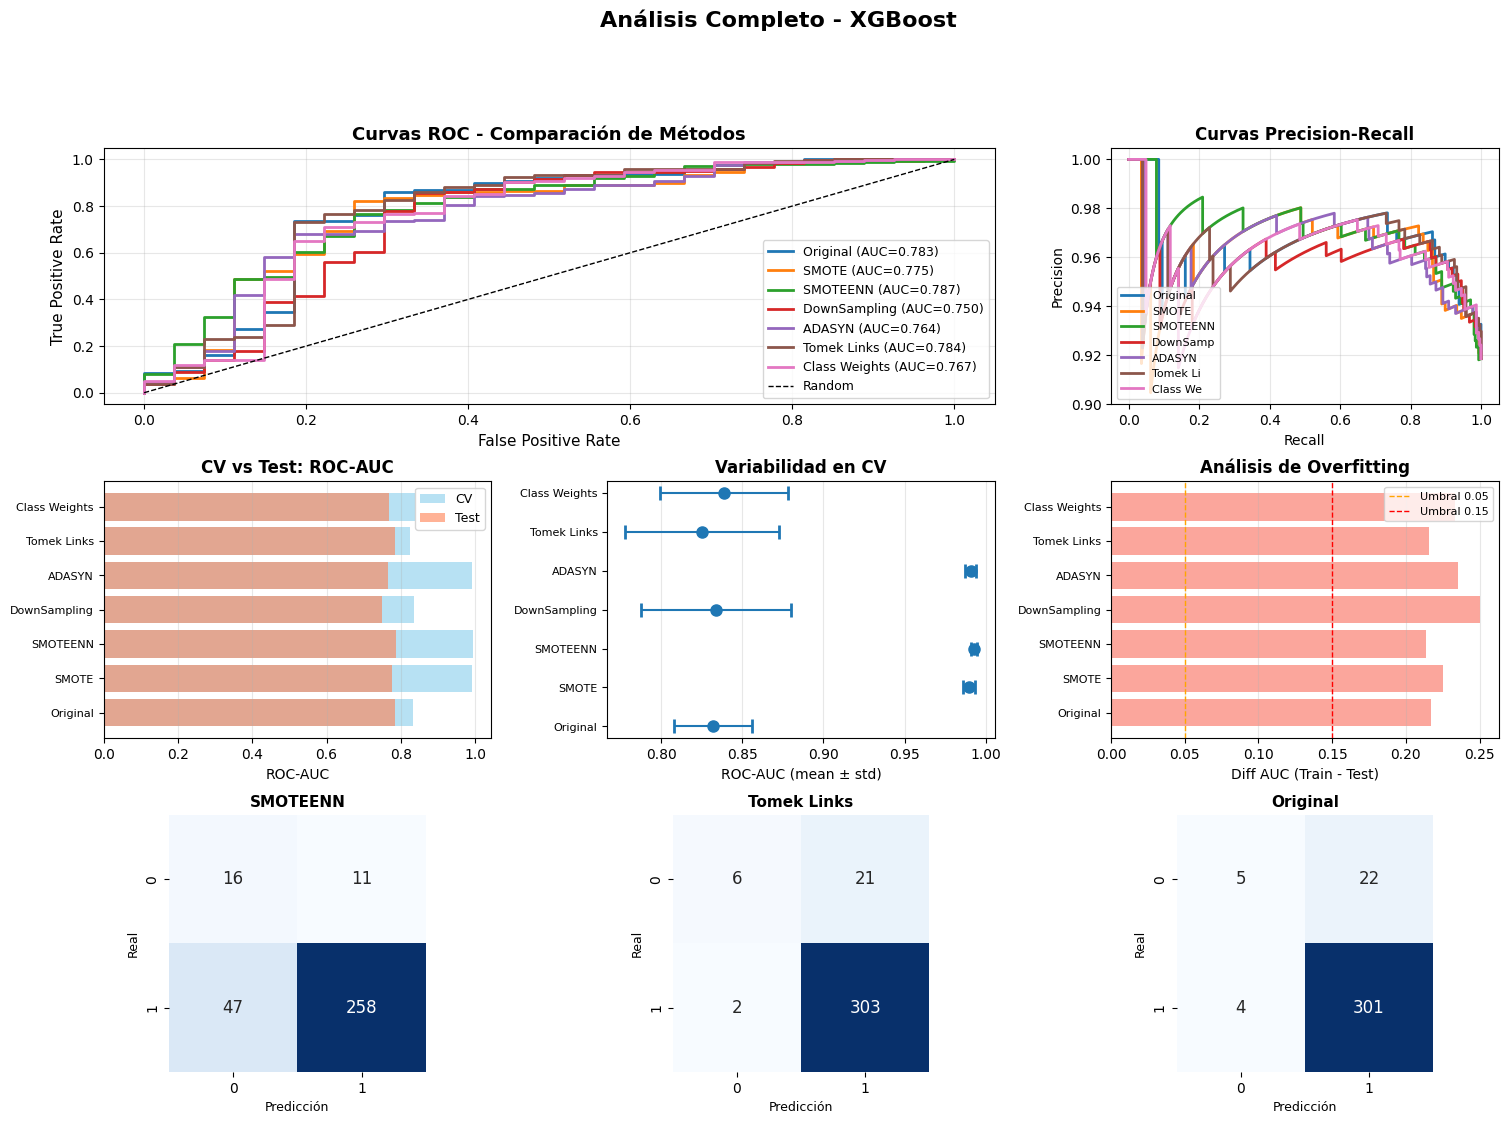

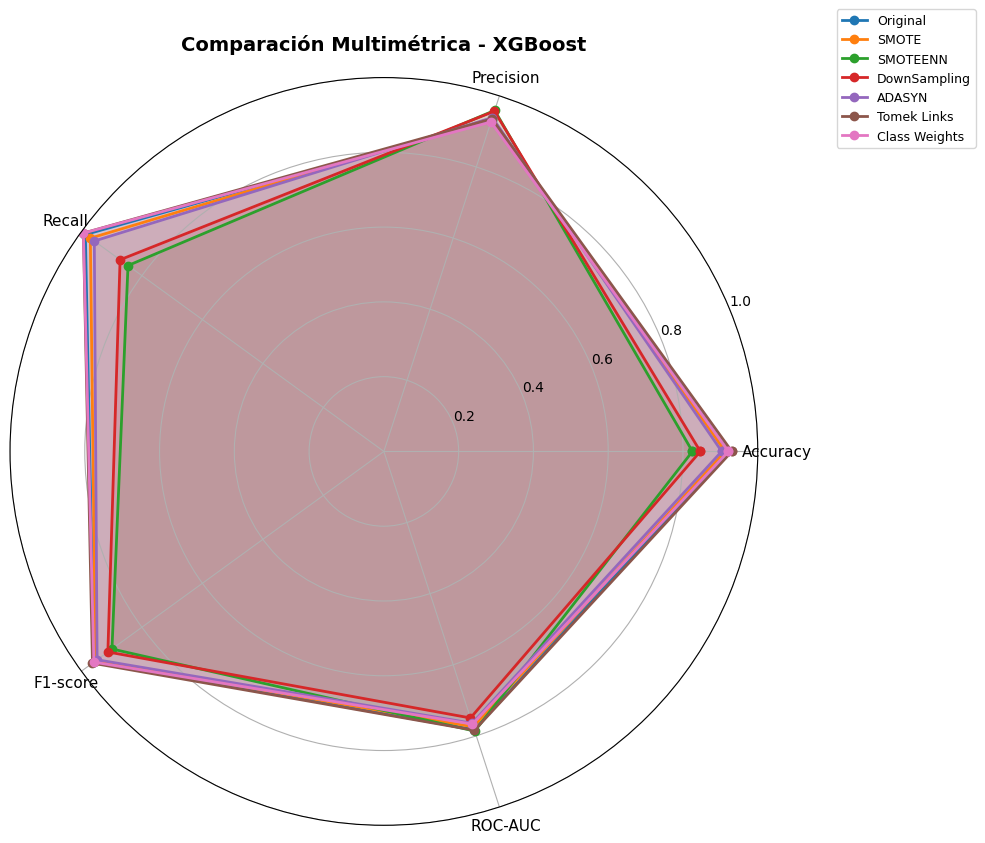


 📈 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.894578  0.041445  0.825301  0.875000  0.912651  0.921687   
Precision    7.0  0.940748  0.012416  0.926606  0.933537  0.936709  0.947871   
Recall       7.0  0.945667  0.061071  0.845902  0.914754  0.970492  0.990164   
F1-score     7.0  0.941960  0.025513  0.898955  0.930287  0.953301  0.958730   
ROC-AUC      7.0  0.772764  0.013330  0.749605  0.765695  0.774742  0.783546   

                max  
Accuracy   0.930723  
Precision  0.959108  
Recall     0.993443  
F1-score   0.963434  
ROC-AUC    0.786521  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.928229  0.050051  0.817885  0.933651  0.938970   
CV Precision    7.0  0.933521  0.046135  0.834543  0.933636  0.939762   
CV Recall       7.0  0.965629  0.044154  0.896993  0.943548  0.980308   
CV F1           7.0  0.94

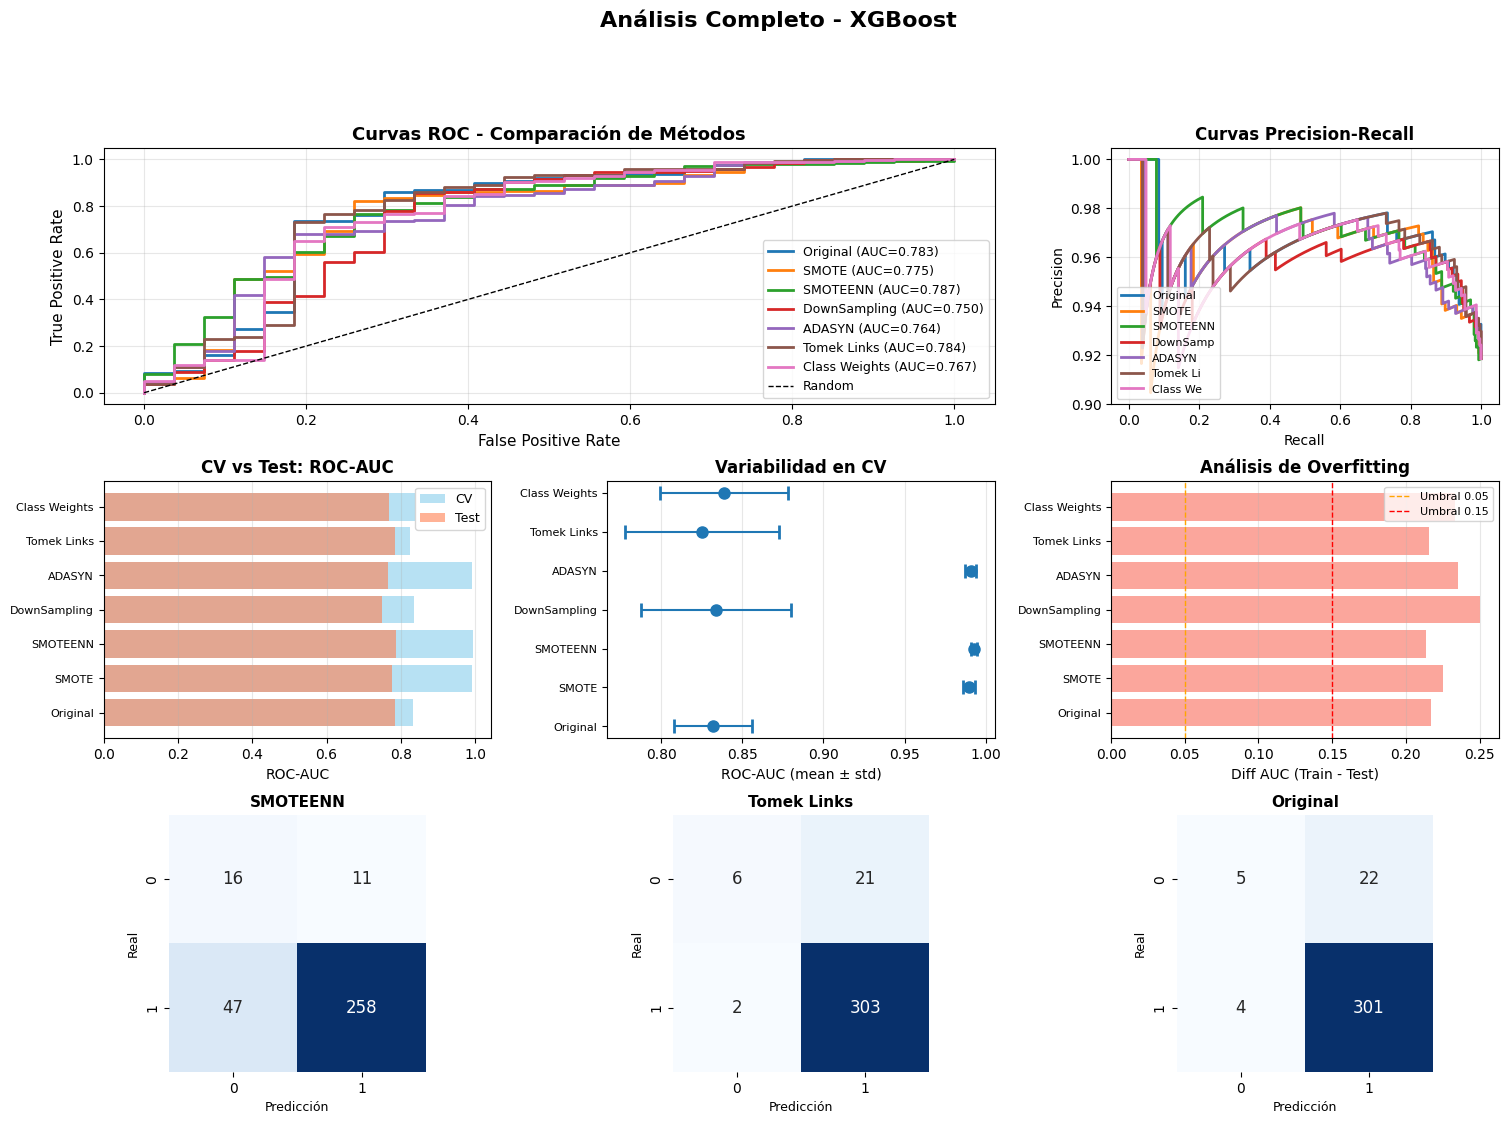

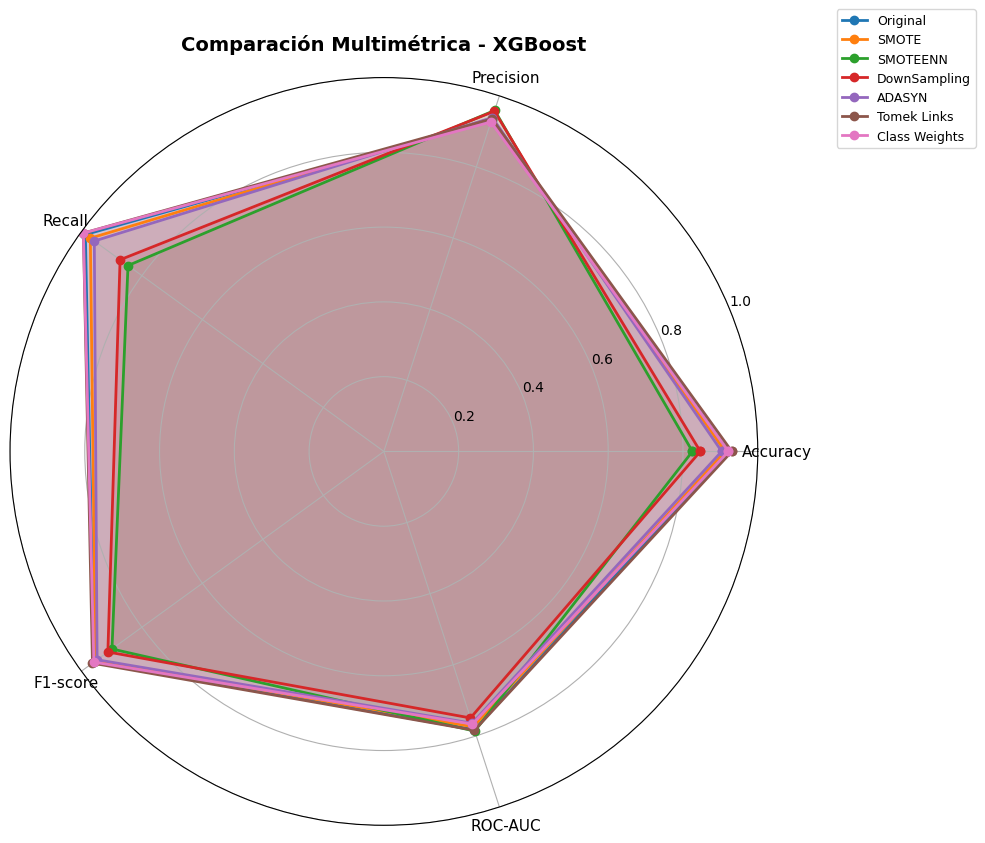


 📈 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.894578  0.041445  0.825301  0.875000  0.912651  0.921687   
Precision    7.0  0.940748  0.012416  0.926606  0.933537  0.936709  0.947871   
Recall       7.0  0.945667  0.061071  0.845902  0.914754  0.970492  0.990164   
F1-score     7.0  0.941960  0.025513  0.898955  0.930287  0.953301  0.958730   
ROC-AUC      7.0  0.772764  0.013330  0.749605  0.765695  0.774742  0.783546   

                max  
Accuracy   0.930723  
Precision  0.959108  
Recall     0.993443  
F1-score   0.963434  
ROC-AUC    0.786521  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.928229  0.050051  0.817885  0.933651  0.938970   
CV Precision    7.0  0.933521  0.046135  0.834543  0.933636  0.939762   
CV Recall       7.0  0.965629  0.044154  0.896993  0.943548  0.980308   
CV F1           7.0  0.94

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve,
                             confusion_matrix, precision_recall_curve, auc, make_scorer)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ===============================
# CONFIGURACIÓN DEL MODELO
# ===============================
# Descomenta el modelo que quieras usar:

# MODELO_TIPO = "LogisticRegression"
# MODELO_TIPO = "DecisionTree"
# MODELO_TIPO = "RandomForest"
# MODELO_TIPO = "KNN"
# MODELO_TIPO = "SVM"
# MODELO_TIPO = "GradientBoosting"
MODELO_TIPO = "XGBoost"

# Configuración de Cross-Validation
N_FOLDS = 5
RANDOM_STATE = 42

print("="*70)
print(f" ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - {MODELO_TIPO.upper()}")
print("="*70)
print(f" Cross-Validation: {N_FOLDS}-Fold Stratified")
print("="*70)

# ===============================
# FUNCIÓN PARA CREAR MODELOS
# ===============================
def crear_modelo(tipo, usar_class_weight=False):
    """Crea el modelo según el tipo especificado"""

    if tipo == "LogisticRegression":
        cw = 'balanced' if usar_class_weight else None
        return LogisticRegression(max_iter=1000, class_weight=cw, random_state=RANDOM_STATE)

    elif tipo == "DecisionTree":
        cw = 'balanced' if usar_class_weight else None
        return DecisionTreeClassifier(
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            min_samples_leaf=5
        )

    elif tipo == "RandomForest":
        cw = 'balanced' if usar_class_weight else None
        return RandomForestClassifier(
            n_estimators=100,
            class_weight=cw,
            random_state=RANDOM_STATE,
            max_depth=10,
            min_samples_split=20,
            n_jobs=-1
        )

    elif tipo == "KNN":
        # KNN no soporta class_weight directamente
        return KNeighborsClassifier(
            n_neighbors=5,
            weights='distance',  # Pondera por distancia
            metric='minkowski',
            n_jobs=-1
        )

    elif tipo == "SVM":
        cw = 'balanced' if usar_class_weight else None
        return SVC(
            class_weight=cw,
            random_state=RANDOM_STATE,
            kernel='rbf',
            probability=True,  # Necesario para predict_proba
            C=1.0,
            gamma='scale'
        )

    elif tipo == "GradientBoosting":
        return GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=RANDOM_STATE,
            subsample=0.8
        )

    elif tipo == "XGBoost":
        # XGBoost usa scale_pos_weight en lugar de class_weight
        if usar_class_weight:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                scale_pos_weight=3,  # Ajusta según tu desbalance
                eval_metric='logloss',
                use_label_encoder=False
            )
        else:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                eval_metric='logloss',
                use_label_encoder=False
            )

# ===============================
# CONFIGURACIÓN DE DATASETS
# ===============================
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# Métricas para cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

resultados_train = []
resultados_test = []
resultados_cv = []
matrices_confusion = {}
curvas_pr = {}
modelos_entrenados = {}

# ===============================
# ENTRENAMIENTO Y EVALUACIÓN
# ===============================
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

for nombre, (X_tr, y_tr) in datasets.items():
    print(f"\n{'='*70}")
    print(f" ENTRENANDO: {nombre}")
    print(f"{'='*70}")

    # Crear modelo
    usar_cw = (nombre == "Class Weights")
    modelo = crear_modelo(MODELO_TIPO, usar_class_weight=usar_cw)

    # ===== CROSS-VALIDATION =====
    print("\n--- CROSS-VALIDATION (Train) ---")
    cv_results = {}

    for metric_name, metric_func in scoring.items():
        scores = cross_val_score(modelo, X_tr, y_tr, cv=skf, scoring=metric_func, n_jobs=-1)
        cv_results[metric_name] = scores
        print(f"{metric_name.upper():12s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    resultados_cv.append({
        "Método": nombre,
        "CV Accuracy": cv_results['accuracy'].mean(),
        "CV Accuracy Std": cv_results['accuracy'].std(),
        "CV Precision": cv_results['precision'].mean(),
        "CV Recall": cv_results['recall'].mean(),
        "CV F1": cv_results['f1'].mean(),
        "CV ROC-AUC": cv_results['roc_auc'].mean(),
        "CV ROC-AUC Std": cv_results['roc_auc'].std()
    })

    # Entrenar modelo final
    modelo.fit(X_tr, y_tr)
    modelos_entrenados[nombre] = modelo

    # ===== MÉTRICAS TRAIN =====
    y_pred_train = modelo.predict(X_tr)
    y_prob_train = modelo.predict_proba(X_tr)[:, 1]

    print("\n--- MÉTRICAS TRAIN (Full) ---")
    print(classification_report(y_tr, y_pred_train))

    resultados_train.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_tr, y_pred_train),
        "Precision": precision_score(y_tr, y_pred_train),
        "Recall": recall_score(y_tr, y_pred_train),
        "F1-score": f1_score(y_tr, y_pred_train),
        "ROC-AUC": roc_auc_score(y_tr, y_prob_train),
        "Tamaño": len(y_tr)
    })

    # ===== MÉTRICAS TEST =====
    y_pred_test = modelo.predict(X_test)
    y_prob_test = modelo.predict_proba(X_test)[:, 1]

    print("\n--- MÉTRICAS TEST ---")
    print(classification_report(y_test, y_pred_test))

    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0

    resultados_test.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-score": f1_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_prob_test),
        "Especificidad": especificidad
    })

    # Guardar matriz de confusión
    matrices_confusion[nombre] = cm

    # Guardar curva Precision-Recall
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob_test)
    curvas_pr[nombre] = (precision_vals, recall_vals, auc(recall_vals, precision_vals))

# ===============================
# DATAFRAMES DE RESULTADOS
# ===============================
df_train = pd.DataFrame(resultados_train)
df_test = pd.DataFrame(resultados_test)
df_cv = pd.DataFrame(resultados_cv)

print("\n" + "="*70)
print(" 📊 RESULTADOS CROSS-VALIDATION")
print("="*70)
print(df_cv.sort_values(by="CV ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TRAIN (Full)")
print("="*70)
print(df_train.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" 📊 TABLA COMPARATIVA - TEST")
print("="*70)
print(df_test.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

# ===============================
# ANÁLISIS DE OVERFITTING
# ===============================
print("\n" + "="*70)
print(" 🔍 ANÁLISIS DE OVERFITTING")
print("="*70)

overfitting_analysis = []
for i, row_train in df_train.iterrows():
    metodo = row_train['Método']
    row_test = df_test[df_test['Método'] == metodo].iloc[0]
    row_cv = df_cv[df_cv['Método'] == metodo].iloc[0]

    overfitting_analysis.append({
        'Método': metodo,
        'Train-Test (Acc)': row_train['Accuracy'] - row_test['Accuracy'],
        'Train-Test (AUC)': row_train['ROC-AUC'] - row_test['ROC-AUC'],
        'CV-Test (AUC)': row_cv['CV ROC-AUC'] - row_test['ROC-AUC'],
        'CV Std AUC': row_cv['CV ROC-AUC Std']
    })

df_overfit = pd.DataFrame(overfitting_analysis)
print(df_overfit.sort_values(by='Train-Test (AUC)').to_string(index=False))

# ===============================
# VISUALIZACIONES
# ===============================

# 1. PANEL PRINCIPAL
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Subplot 1: Curvas ROC
ax1 = fig.add_subplot(gs[0, :2])
for nombre, modelo in modelos_entrenados.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    ax1.plot(fpr, tpr, label=f'{nombre} (AUC={roc_auc:.3f})', linewidth=2)

ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=11)
ax1.set_ylabel('True Positive Rate', fontsize=11)
ax1.set_title('Curvas ROC - Comparación de Métodos', fontsize=13, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Subplot 2: Curvas Precision-Recall
ax2 = fig.add_subplot(gs[0, 2])
for nombre, (precision_vals, recall_vals, pr_auc) in curvas_pr.items():
    ax2.plot(recall_vals, precision_vals, label=f'{nombre[:8]}', linewidth=2)

ax2.set_xlabel('Recall', fontsize=10)
ax2.set_ylabel('Precision', fontsize=10)
ax2.set_title('Curvas Precision-Recall', fontsize=12, fontweight='bold')
ax2.legend(loc='lower left', fontsize=8)
ax2.grid(True, alpha=0.3)

# Subplot 3: Comparación CV vs Test
ax3 = fig.add_subplot(gs[1, 0])
metodos = df_cv['Método']
x_pos = np.arange(len(metodos))

ax3.barh(x_pos, df_cv['CV ROC-AUC'], alpha=0.6, label='CV', color='skyblue')
ax3.barh(x_pos, df_test['ROC-AUC'], alpha=0.6, label='Test', color='coral')
ax3.set_yticks(x_pos)
ax3.set_yticklabels(metodos, fontsize=8)
ax3.set_xlabel('ROC-AUC', fontsize=10)
ax3.set_title('CV vs Test: ROC-AUC', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Subplot 4: Variabilidad CV
ax4 = fig.add_subplot(gs[1, 1])
ax4.errorbar(df_cv['CV ROC-AUC'], x_pos, xerr=df_cv['CV ROC-AUC Std'],
             fmt='o', capsize=5, capthick=2, markersize=8)
ax4.set_yticks(x_pos)
ax4.set_yticklabels(metodos, fontsize=8)
ax4.set_xlabel('ROC-AUC (mean ± std)', fontsize=10)
ax4.set_title('Variabilidad en CV', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# Subplot 5: Overfitting
ax5 = fig.add_subplot(gs[1, 2])
ax5.barh(x_pos, df_overfit['Train-Test (AUC)'], alpha=0.7, color='salmon')
ax5.set_yticks(x_pos)
ax5.set_yticklabels(metodos, fontsize=8)
ax5.set_xlabel('Diff AUC (Train - Test)', fontsize=10)
ax5.set_title('Análisis de Overfitting', fontsize=12, fontweight='bold')
ax5.axvline(x=0.05, color='orange', linestyle='--', linewidth=1, label='Umbral 0.05')
ax5.axvline(x=0.15, color='red', linestyle='--', linewidth=1, label='Umbral 0.15')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3, axis='x')

# Subplot 6-8: Mejores 3 matrices de confusión
top3_metodos = df_test.nlargest(3, 'ROC-AUC')['Método'].tolist()
for idx, metodo in enumerate(top3_metodos):
    ax = fig.add_subplot(gs[2, idx])
    cm = matrices_confusion[metodo]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, square=True, annot_kws={'size': 12})
    ax.set_title(f'{metodo}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicción', fontsize=9)
    ax.set_ylabel('Real', fontsize=9)

plt.suptitle(f'Análisis Completo - {MODELO_TIPO}', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# 2. GRÁFICO RADAR COMPARATIVO
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categorias = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
N = len(categorias)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for metodo in df_test['Método']:
    valores = df_test[df_test['Método'] == metodo][categorias].values[0].tolist()
    valores += valores[:1]
    ax.plot(angles, valores, 'o-', linewidth=2, label=metodo)
    ax.fill(angles, valores, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, size=11)
ax.set_ylim(0, 1)
ax.set_title(f'Comparación Multimétrica - {MODELO_TIPO}', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# ESTADÍSTICAS DESCRIPTIVAS
# ===============================
print("\n" + "="*70)
print(" 📈 ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
print("\n--- TEST ---")
print(df_test[['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']].describe().T)
print("\n--- CROSS-VALIDATION ---")
print(df_cv[['CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1', 'CV ROC-AUC']].describe().T)

# ===============================
# RECOMENDACIONES
# ===============================
print("\n" + "="*70)
print(" 💡 RECOMENDACIONES FINALES")
print("="*70)

mejor_cv = df_cv.loc[df_cv['CV ROC-AUC'].idxmax()]
mejor_test = df_test.loc[df_test['ROC-AUC'].idxmax()]
mejor_recall = df_test.loc[df_test['Recall'].idxmax()]
mejor_precision = df_test.loc[df_test['Precision'].idxmax()]
mejor_f1 = df_test.loc[df_test['F1-score'].idxmax()]
menos_overfit = df_overfit.loc[df_overfit['Train-Test (AUC)'].idxmin()]
mas_estable = df_cv.loc[df_cv['CV ROC-AUC Std'].idxmin()]

print(f"\n🏆 MEJOR RENDIMIENTO:")
print(f"  • CV ROC-AUC: {mejor_cv['Método']} ({mejor_cv['CV ROC-AUC']:.4f} ± {mejor_cv['CV ROC-AUC Std']:.4f})")
print(f"  • Test ROC-AUC: {mejor_test['Método']} ({mejor_test['ROC-AUC']:.4f})")
print(f"  • Recall: {mejor_recall['Método']} ({mejor_recall['Recall']:.4f})")
print(f"  • Precision: {mejor_precision['Método']} ({mejor_precision['Precision']:.4f})")
print(f"  • F1-Score: {mejor_f1['Método']} ({mejor_f1['F1-score']:.4f})")

print(f"\n🎯 GENERALIZACIÓN:")
print(f"  • Menor Overfitting: {menos_overfit['Método']} (diff={menos_overfit['Train-Test (AUC)']:.4f})")
print(f"  • Mayor Estabilidad CV: {mas_estable['Método']} (std={mas_estable['CV ROC-AUC Std']:.4f})")

print("\n" + "="*70)